# Uczenie częściowo nadzorowane (semi-supervised learning) – metody zaawansowane




W naszej prezentacji przedstawimy 3 bardziej zaawansowane algorytmy uczenia częściowo nadzorowanego, które działają również dla bardziej skomplikowanych problemów. Będą to kolejno:



*   **Contrastive Pessimistic Likelihood Estimation** (CPLE)
*   **Semi-Supervised Support Vector Machines** (S3VM)
*   **Transductive Support Vector Machines** (TSVM)
  






# CPLE

## CPLE — wprowadzenie

Jedną z przyczyn powstania algorytmu CPLE (jak i wielu innych algorytmów uczenia częściowo nadzorowanego) był fakt, że w wielu życiowych problemach **łatwiej pozyskać dane bez etykiet niż dane z etykietami** (często musimy np. sami nadać danym etykiety, co jest czasochłonne).

Z tego powodu wielu badaczy pracowało nad rozwojem algorytmów uczenia maszynowego. Algorytm CPLE został zaproponowany przez Looga w 2015 roku.



Zanim przejdziemy do algorytmu, omówimy pewne zagadnienia z nim związane.

**Log-likelihood cost function (logarytmiczna funkcja wiarygodności)**

Wiele klasyfikatorów (np. Logistyczna Regresja) działa w oparciu o metodę wyznaczania estymatora największej wiarygodności (ENW).

Załóżmy, że mamy N próbek $x$ z etykietami $y$. W ogólnym przypadku definiuje się tzw. log-likelihood cost function (po polsku: logarytmiczna funkcja wiarygodności).

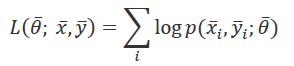

Dla tej funkcji szuka się takiego wektora $θ$, który ją maksymalizuje (szukamy ENW).

Po przeszkoleniu modelu (znalezieniu takiej θ), możemy za jego pomocą dokonywać predykcji, a dokładniej wyznaczać prawdopodobieństwo:         p(yᵢ|xᵢ,θ), czyli prawdopodobieństwo, że obserwacja xᵢ należy do klasy yᵢ.

Np. w regresji logistycznej wykorzystywana jest funkcja logistyczna modelowania prawdopodobieństwa zdarzenia. Funkcja ta ma postać

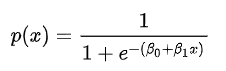

Gdzie $\beta_0$ i $\beta_1$ są estymowane za pomocą metody największej wiarygodności

Tu pojawia się problem: w naszym algorytmie będziemy potrzebować, by klasyfikator zwracał właśnie wspomniane prawdopodobieństwa, jednak nie każda metoda działa w ten sposób. Niektóre, jak np. SVM, obliczają wartość pewnej funkcji $f(xᵢ,θ)$ i na podstawie jej wartości dokonują predykcji w następujący sposób (przypadek binarny):

* gdy $f \geq 0$ obserwacja jest z 1. klasy,
* gdy $f <0$ to obserwacja jest z 2. klasy.
   

Aby rozwiązać ten problem używa się techniki zwanej <u> Platt scaling </u> (skalowanie Platta). Za pomocą sigmoidalnej funkcji przekształca się funkcję $f$ tak, aby zwracała prawdopodobieństwa. Dla binarnego klasyfikatora to przekształcenie zadane jest wzorem:

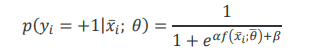

W powyższym wzorze α i β to parametry, które uczymy na zbiorze testowym w taki sposób, aby zmaksymalizować wiarygodność.

W praktyce nie musimy się przejmować się tym problemem, ponieważ biblioteka scikit-learn zawiera metodę predict_proba(), która zwraca prawdopodobieństwa należenia do danej klasy. Dodatkowo w wielu algorytmach, np. w SVM wystarczy ustawić parametr probability=TRUE, aby otrzymać te prawdopodobieństwa.

## CPLE — teoria

Rozważmy zbiór danych, w którym:
* N pierwszych próbek jest oznaczonych,
* kolejne M to próbki nieoznaczone,
* mamy k klas.









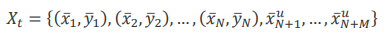

Dla nieoznaczonych próbek xᵘ będziemy używać tzw. **soft-labels** (miękkich etykiet). Będą to k-wymiarowe wektory  qᵢ (k to liczba klas), zawierające prawdopodobieństwa, że i-ta próbka należy do klasy. Te prawdopodobieństwa <u> wybieramy  losowo</u>, a następnie optymalizujemy je w procesie uczenia.

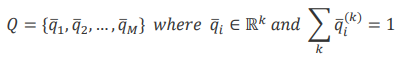


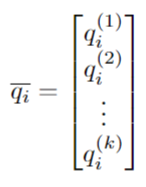

Całkowita logarytmiczna funkcja wiarygodności w przypadku, gdy mamy zarówno dane oznaczone i nieoznaczone składa się z dwóch części:

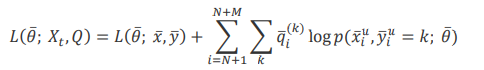



Pierwsza część dotyczy oznakowanych danych. Wzór na wiarygodność pokrywa się tu ze wspomnianym wcześniej wzorem:

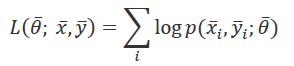

Druga część wzoru dotyczy danych nieoznakowanych. W tym przypadku musimy wziąć pod uwagę prawdopodobieństwa należenia do danej klasy i-tej obserwacji (stąd druga suma po k). Można traktować ją jako ważoną funkcję wiarygodności, gdzie wagi to prawdopodobieństwa q.

Teraz możemy omówić postępowanie algorytmu.



1.   Trenujemy klasyfikator <u> TYLKO na danych oznaczonych </u> i otrzymujemy w ten sposób pewien parametr $θ_{sup}$. Obliczamy wiarygodność tego modelu $L(\overline{\theta}_{sup}; X_t, Q)$
2.   Trenujemy klasyfikator na wszystkich danych (etykiety danych nieoznaczonych zależą od prawdopodobieństw Q !)i otrzymujemy parametr $\overline{\theta}$. Obliczamy wiarygodność tego modelu $L(\overline{\theta}; X_t, Q)$
3.   Następnie przez CL (contrastive likelihood) definiujemy różnicę między wiarygodnością modelu wytrenowanego na wszystkich danych a wiarygodnością modelu wytrenowanego tylko dla danych oznaczonych.


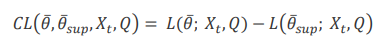

Oczywiście chcemy aby ta różnica była jak największa, bo to by oznaczało, że nasz ostateczny model jest dużo lepszy od modelu wytrenowanego tylko na danych oznaczonych.

Teraz pojawia się najmniej intuicyjna część.

4.  Wprowadzamy tzw. pesymistyczny warunek:




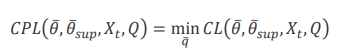

Na pierwszy rzut oka Wydaje się on być zupełnie sprzeczny, bo przecież chcieliśmy maksymalizować wartość CL.

Ma on jednak dość proste uzasadnienie: ponieważ  prawdopodobieństwa q są przypisywane do nieoznakowanych danych <u> losowo</u>, nie powinniśmy im ufać.

5. Po zminimalizowaniu funkcji CL jak wyżej, szukamy argumentu Θ maksymalizującego otrzymaną funkcję CPL (podejście największej wiarygodności). W praktyce wystarczy nauczyć model na wszystkich danych (danym nieoznaczonym przypisuje się miękkie etykiety zgodnie z prawdopodobieństwami z kroku 4.)

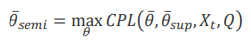


Podsumowanie algorytmu:


*   Losujemy prawdopodobieństwa q dla danych nieoznaczonych.
*   Trenujemy klasyfikator osobno na danych oznaczonych i na całym modelu.
* Szukamy prawdopodobieństw minimalizujących CL.
* Trenujemy model na wszystkich danych, uwzględniając prawdopodobieństwa z poprzedniego punktu

## CPLE — przykład

Najpierw zaimportujmy potrzebne rzeczy.

In [ ]:
import numpy as np
from scipy.optimize import fmin_bfgs #algorytm znajdujący minimum funkcji
from sklearn.datasets import load_digits #zbiór danych
from sklearn.linear_model import LogisticRegression #klasyfikator: Regresja logistyczna
from sklearn.model_selection import cross_val_score #walidacja krzyżowa

# Ustalamy losowość
np.random.seed(1000)


OPIS ZBIORU DANYCH:
Działanie algorytmu zilustrujemy na zbiorze danych loads_digits. Zbiór ten zawiera zdjęcia 8x8 odręcznie pisanych cyfr.

* liczba obserwacji = 1797 (około 180 w każdej klasie)
* liczba klas = 10 (cyfry 0, 1, ..., 9)
* liczba cech = 64
* cechy to liczby całkowite od 0 do 16


Dokumentacja: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

Przeprowadzimy klasyfikacje binarną: wybierzemy tylko dane dotyczące cyfr 0 i 1.

Zanim przejdziemy do właściwego kodu, zaprezentujemy działanie podstawowych funkcji z biblioteki numpy, które będą nam potrzebne.

In [ ]:
#funkcja np.vstack ustawia tablice pionowo „jedna pod drugą"
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.vstack((a,b))

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
#funkcja np.expand_dims rozszerza wymiar tablicy
x = np.array([1, 2])
print("x:",x)
print("x.shape:", x.shape) #rozmiar tablicy x
y = np.expand_dims(x, axis=1)
#parametr axis decyduje „w którą stronę" rozszerzana jest tablica
#axis = 0: oś pozioma, axis = 1: oś pionowa
print("y:",y)
print("y.shape:", y.shape) #rozmiar tablicy y

x: [1 2]
x.shape: (2,)
y: [[1]
 [2]]
y.shape: (2, 1)


In [ ]:
#funkcja np.squeeze działa w odwrotny sposób do funkcji expand dims
#(zmniejsza wymiar tablicy)
print(y) #y z poprzedniej komórki
z=np.squeeze(y, axis=1)
print(z) #tablica z jest taka sama jak wyjsciowa tablica x
print(z.shape)

[[1]
 [2]]
[1 2]
(2,)


Właściwy kod.

In [ ]:
# Ładujemy zbiór danych
X_a, Y_a = load_digits(return_X_y=True)
#parametr return_X_y=True sprawia, że powyższa funkcja zwraca obiekt typu tuple
#jest on postaci: (data, target)

# Wybieramy podzbiór zawierający dane dotyczące zer i jedynek:
#Funkcja np.vstack układa tablice po kolei w pionie
X = np.vstack((X_a[Y_a == 0], X_a[Y_a == 1]))
#np.expand_dims rozszerza wymiar tablicy
Y = np.vstack((np.expand_dims(Y_a, axis=1)[Y_a == 0], np.expand_dims(Y_a, axis=1)[Y_a == 1]))

#tablica X zawiera JEDYNIE cechy
#tablica Y zawiera etykiety

print("Wymiar tablicy X:", X. shape)
print("Wymiar tablicy Y:", Y. shape)

Wymiar tablicy X: (360, 64)
Wymiar tablicy Y: (360, 1)


Jak widać nasz zbiór składa się z 360 obserwacji i 64 cech.

Z tych 360 obserwacji wybierzemy 150, które będą naszymi danymi bez etykiet.

In [ ]:
nb_unlabeled = 150 #liczba danych bez etykiet
nb_samples = X.shape[0] #liczba próbek = 360
nb_dimensions = X.shape[1] #liczba cech = 64

#np.zeros wypełania tablice zerami
Y_true = np.zeros((nb_unlabeled,))
#w tablicy Y_true będziemy później przechowywać prawdziwe etykiety
# 150 danych nieoznakowanych


Wybierzemy teraz indeksy danych bez etykiet.

In [ ]:
#losujemy indeksy ze zbioru {0,1,...,359}
unlabeled_idx = np.random.choice(np.arange(0, nb_samples, 1), replace=False, size=nb_unlabeled)
# np.random.choice generuje losową próbke z podanego zbioru danych
#np.arange zwraca równomiernie rozmieszczone wartości w danym przedziale
#(tutaj od 0 do np.samples-1=359; konwencja Pythona)
# o wartościach o 1 większa od poprzedniej

# replace = False — losujemy bez zwracania


In [ ]:
# Do tablicy wypełnionej zerami kopiujemy prawdziwe etykiety obserwacji
#które uznaliśmy obserwacje bez etykiet
#(później porównamy je z przewidywanymi)
Y_true = Y[unlabeled_idx].copy()

# Teraz w tablicy Y obserwacjom z nieznanymi etykietami przypisujemy wartość -1
Y[unlabeled_idx] = -1

Wytrenujemy teraz klasyfikator Regresji Logistycznej na danych oznaczonych.

In [ ]:
lr_test = LogisticRegression(solver="lbfgs", max_iter=10000, multi_class="auto",
                             n_jobs=-1, random_state=1000)
# solver - algorytm do wykorzystania w problemie optymalizacji, wartość domyślna to lbfhs
# max_inter - maksymalna liczba iteracji potrzebna do otrzymania zbieznosci rozwiązań
# multiclass - multi_class określa, czy model ma obsługiwać wiele klas.
# W tym przypadku, "auto" oznacza, że biblioteka scikit-learn sama podejmie decyzję na podstawie rodzaju problemu.
# n_jobs - określa liczbę rdzeni procesora, które zostaną użyte do obliczeń.

# n_jobs=-1 powoduje, że algorytm wykorzysta wszystkie dostępne rdzenie CPU do obliczeń, co może znacząco przyspieszyć proces uczenia
# uczenie modelu na danych z etykietami (wykluczamy "Y=-1")
lr_test.fit(X[Y.squeeze() != -1], Y[Y.squeeze() != -1].squeeze()) # dostosowywujemy model do danych treningowych

unlabeled_score = lr_test.score(X[Y.squeeze() == -1], Y_true) #przewidujemy tym modelem dane bez etykiet (później będziemy chcieli porównać)
print(unlabeled_score)

0.4533333333333333


Korzystamy z gotowej funkcji score zwracającej dokładność predykcji naszego klasyfikatora. Dokładność wynosi 45%.

Ocenimy teraz ten model przy użyciu walidacji krzyżowej.

In [ ]:
# Sprawdzamy wyniki CV (walidacji krzyżowej) używając tylko regresji logistycznej.
total_cv_scores = cross_val_score(
        LogisticRegression(solver="lbfgs", max_iter=10000, multi_class="auto",
                           random_state=1000), X, Y.squeeze(), cv=10, n_jobs=-1)

print('CV scores (only Logistic Regression)')
print(total_cv_scores)
# cv=10 oznacza, że przeprowadzona zostanie walidacja krzyżowa na 10 podzbiorach danych

CV scores (only Logistic Regression)
[0.38888889 0.58333333 0.44444444 0.58333333 0.5        0.33333333
 0.5        0.5        0.47222222 0.47222222]


Liczymy średnią dokładność.

In [ ]:
import statistics
data1 = total_cv_scores
x = statistics.mean(data1)
x

0.4777777777777778

Średnia dokładność wynosi około 48%.

Teraz zbudujemy model na podstawie omówionego algorytmu CPLE.

Najpierw dla każdej ze 150 nieoznakowanych próbek generujemy losowo prawdopodobieństwo, że dana próbka jest cyfrą 1 (co wyznacza jednoznacznie prawdopodobieństwo, że próbka jest cyfrą 0).

In [ ]:
q0 = np.random.uniform(0, 1, size=nb_unlabeled)
#q0 to 150 elementowy wektor prawdopodobieństw

#Na podstawie q0 stworzymy nowy wektor Y_unlabeled:
#na i-tym miejscu będzie zawierał tę etykietę i-tej obserwacji,
#która jest bardziej prawdopodobna, tzn: 0, gdy q < 0.5 i 1 w przeciwnym przypadku

#tworzymy funkcję, która będzie zamieniać prawdopodobieństwa na etykiety
trh = np.vectorize(lambda x: 0.0 if x < 0.5 else 1.0)
#„wektoryzujemy" funkcję podaną w nawiasie
#tzn. biorąc trh(q0) zostanie ona zaaplikowana do każdej współrzędnej wektora q0

Zdefiniujemy teraz funkcję budującą zbiór danych przy ustalonym wektorze prawdopodobieństw q.

In [ ]:
def build_dataset(q):
    Y_unlabeled = trh(q) # Przypisanie miękkich etykiet dla danych nieoznaczonych

    X_n = np.zeros((nb_samples, nb_dimensions))
    #segregujemy dane:
    #najpierw wpisujemy oznaczone dane
    X_n[0:nb_samples - nb_unlabeled] = X[Y.squeeze() != -1]
    #a na końcu nieoznaczone
    X_n[nb_samples - nb_unlabeled:] = X[Y.squeeze() == -1]

    #w ten sam sposób segregujemy Y-ki
    Y_n = np.zeros((nb_samples, 1))
    #przepisujemy etykiety dla oznaczonych danych
    Y_n[0:nb_samples - nb_unlabeled] = Y[Y.squeeze() != -1]
    #etykiety dla danych nieoznaczonych
    Y_n[nb_samples - nb_unlabeled:] = np.expand_dims(Y_unlabeled, axis=1)
    # rozszerzamy wymiar tablicy(wymiaru1) - Y_unlabeled  do tablicy(wymiaru2) - Y_n
    return X_n, Y_n

Podejście autora.

In [ ]:
def autor_weighted_log_loss(yt, p, w=None, eps=1e-15):
    if w is None:
        w_t = np.ones((yt.shape[0], 2)) #gdy nie podamy wag obie są równe 1
    else:
        w_t = np.vstack((w, 1.0 - w)).T
#1. błąd: powinno być (1.0-w, w), bo q zwraca prawdopodobieństwo, że należy do KLASY 1, a nie klasy 0

    Y_t = np.vstack((1.0 - yt.squeeze(), yt.squeeze())).T
    L_t = np.sum(w_t * Y_t * np.log(np.clip(p, eps, 1.0 - eps)), axis=1)
    #coś jak mnożenie wektor * wektor
    #clip zeby nie było log(0)

    return np.mean(L_t)

# np.clip - Dla danego przedziału, wartości spoza przedziału zostaną ograniczone do krawędzi przedziału.
# Na przykład, jeśli określono przedział [0, 1], to wartości mniejsze niż 0 stają się 0, a wartości większe niż 1 stają się 1.

#2. błąd: nie zadziała dla danych nieoznaczonych
#bo zwróci tylko sumę logarytmów prawdopodobieństw tylko dla tych klas, dla których
#jest większe prawdopodobieństwo, że próbka do nich należy


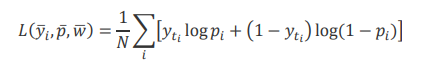

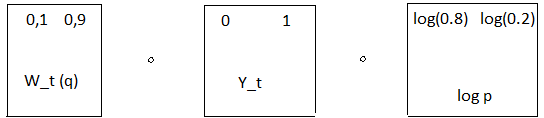

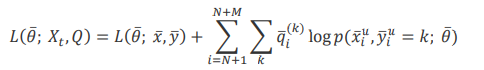


In [ ]:
#Tworzymy funkcję CL
def autor_log_likelihood(q):
    X_n, Y_n = build_dataset(q) #budujemy zbiór
    Y_soft = trh(q) #przypisujemy miękkie etykiety

    lr_test.fit(X_n, Y_n.squeeze()) #uczymy algorytm na danych oznaczonych i tych z miekkimi etykietami

    #p_sup błąd: bo powinniśmy wytrenować model TYLKO na oznaczonych danych, a nie na wszystkich
    p_sup = lr_test.predict_proba(X[Y.squeeze() != -1])
    #p_sup to wektor prawdopodobieństw coś w stylu (należy do 1. klasy, należy do 2 klasy)
    #wyżej w kodzie jest
    p_semi = lr_test.predict_proba(X[Y.squeeze() == -1])  # Y.squeeze() == -1 dane nieoznaczone i bez miekkich etykiet

    l_sup = autor_weighted_log_loss(Y[Y.squeeze() != -1], p_sup)
    l_semi = autor_weighted_log_loss(Y_soft, p_semi, q) # q to są wagi: bo wzór na L druga część dotycząca nieoznakowanych
    #l_semi błąd: bo zwraca wiarygodność tylko dla nieoznaczonych, a nie dla wszystkich

    return l_semi - l_sup


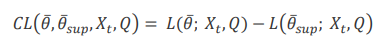

Teraz pokażemy naszą poprawioną wersję.

In [ ]:
lr_labeled = LogisticRegression(solver="lbfgs", max_iter=10000, multi_class="auto",
                             n_jobs=-1, random_state=1000)
lr_whole = LogisticRegression(solver="lbfgs", max_iter=10000, multi_class="auto",
                             n_jobs=-1, random_state=1000)

In [ ]:
def labeled_log_loss(yt, p, eps=1e-15):
    #wiarygodność: część 1 (oznakowane)
    Y_t = np.vstack((1.0 - yt.squeeze(), yt.squeeze())).T
    L_t = np.sum(Y_t * np.log(np.clip(p, eps, 1.0 - eps)), axis=1)


    return np.sum(L_t)

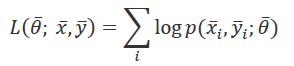

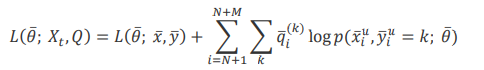


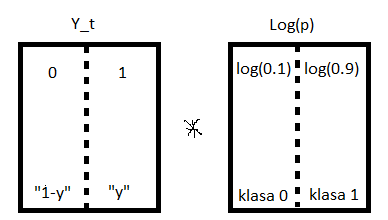

In [ ]:
def unlabeled_log_loss(w, p, eps=1e-15):
    #wiarygodność: część 2 (nieoznakowane)
    w_t = np.vstack((1.0-w, w)).T
    L_t = np.sum(w_t * np.log(np.clip(p, eps, 1.0 - eps)), axis=1)


    return np.sum(L_t)

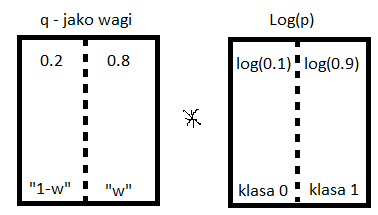

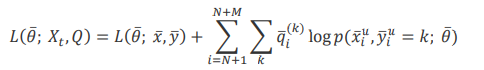


In [ ]:
#Tworzymy funkcję CL
def log_likelihood(q):
    X_n, Y_n = build_dataset(q) #budujemy zbiór
    #Y_n składa się tylko z zer i jedynek: nieoznaczonym obserwacjom przyporządkowaliśmy
    #miękkie etykiety


    lr_labeled.fit(X[Y.squeeze() != -1], Y[Y.squeeze() != -1].squeeze()) #nauczone na oznaczonych
    lr_whole.fit(X_n, Y_n.squeeze()) #nauczone na całym

    #przewidujemy prawdopodobieństwa odpowiednimi modelami
    p_sup = lr_labeled.predict_proba(X_n)
    p_semi = lr_whole.predict_proba(X_n)


    #korzystamy z tego, że dane są ustawione po kolei: najpierw oznaczone, potem nieoznaczone
    l_sup = labeled_log_loss(Y_n[0:nb_samples - nb_unlabeled], p_sup[0:nb_samples - nb_unlabeled]) + unlabeled_log_loss(q, p_sup[nb_samples - nb_unlabeled:])
    l_semi = labeled_log_loss(Y_n[0:nb_samples - nb_unlabeled], p_semi[0:nb_samples - nb_unlabeled]) + unlabeled_log_loss(q, p_semi[nb_samples - nb_unlabeled:])

    return l_semi - l_sup

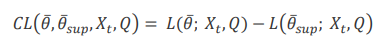

In [ ]:
#BFGS - optymalizacja
print('Training CPLE...')
q_end = fmin_bfgs(log_likelihood,
                     x0=q0,
                     maxiter=1000, disp=False)
# f - funkcja do zminimalizowania
# x0 - to początkowa wartość dla zmiennych niezależnych
#Komentarz: wzór na CPL = min po q ()

Training CPLE...


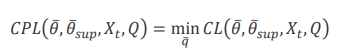

In [ ]:
# Budujemy końcowy zbiór danych
X_n, Y_n = build_dataset(q_end)
#nieoznaczone obserwacje dostają etykiety zgodnie z prawdopodobieństwami q_end

#segregujemy te dane: najpierw oznaczone, potem nieoznaczone

In [ ]:
#sprawdzamy końcowe wyniki używająć CPLE
final_semi_cv_scores = cross_val_score(
        LogisticRegression(solver="lbfgs", max_iter=10000, multi_class="auto", random_state=1000),
        X_n, Y_n.squeeze(), cv=10, n_jobs=-1)

print('CV scores (CPLE)')
print(final_semi_cv_scores)

CV scores (CPLE)
[1.         1.         0.94444444 0.97222222 0.97222222 0.94444444
 0.97222222 1.         1.         0.94444444]


In [ ]:
import statistics

# list of positive integer numbers
data2 = final_semi_cv_scores

x = statistics.mean(data2)
x

0.975

Średnia dokładność to 97.5%.

## Podsumowanie


CPLE jest w stanie przewyższyć standardowe metody klasyfikacji przy ograniczonym koszcie obliczeniowym, który może być względnie większy ze względu na ponowne ocenianie logarytmu wiarygodności przez funkcję optymalizacji. Jednak dodatkowa złożoność jest normalnym warunkiem w uczeniu półnadzorowanym i w tym punkcie powinno być jasne, kiedy ten koszt jest uzasadniony i kiedy bardziej korzystne jest pozostanie przy mniejszym, oznakowanym zestawie danych

# Częściowo nadzorowane maszyny wektorów nośnych (S3VM)

Kolejny algorytm (S3VM) opiera się na algorytmie uczenia nadzorowanego SVM (Support Vector Machines). Z tego powodu omówimy najpierw pokrótce ideę algorytmu SVM.

## SVM w pigułce

### Idea

Wprowadźmy najpierw oznaczenia
* N — liczba obserwacji,
* d — liczba cech,
* $x=[x_1,...,x_d]$ — wektor cech danej obserwacji x,
* $y^{(i)}$ — klasa i-tej obserwacji.

Aby móc lepiej zilustrować koncepcję działania SVM, załóżmy, że:
* mamy 2 klasy  (przypadek binarny), czyli  $y^{(i)}∈\{ -1,1\}$ dla $i=1,...,N$ [WAŻNE, że te klasy to akurat -1 i 1].
* liczba cech d = 2



Na początek weźmy bardzo prosty przypadek: gdy dane są liniowo separowalne (czyli klasy można oddzielić linią prostą).


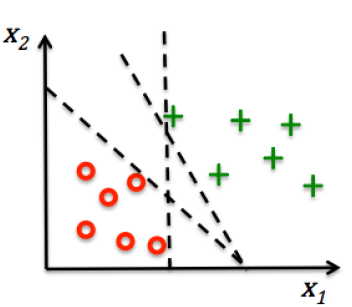

Jak widać, istnieje nieskoczenie wiele prostych oddzielających te 2 klasy. Którą zatem powinniśmy wybrać?

Dla ustalonej granicy decyzyjnej (w przypadku dwuwymiarowym: prostej; wielowymiarowym: hiperpłaszczyzny) definiuje się tzw. **wektory nośne** (ang. support vectors). Są to punkty, które leżą najbliżej tej granicy.

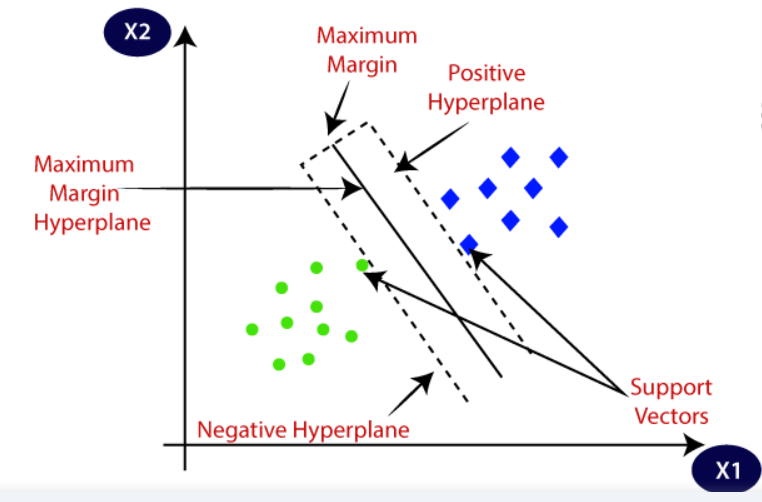

<u> Idea algorytmu SVM: </u> znaleźć taką prostą, aby odległość wektorów nośnych od płaszczyzny, zwana **marginesem**, była jak największa.

Podejście to jest intuicyjne: jeżeli „mocno” rozdzielimy klasy, to później mamy większość pewność, że dobrze sklasyfikujemy nowe obserwacje.

### Matematyczny zapis problemu

W ogólnym przypadku, gdy mamy $d$ cech, hiperpłaszczyzna rozdzielająca może zostać zapisana wzorem (algebra liniowa):

$w^{T}x+w_0 = 0$

gdzie:

* $x=[x_1, ..., x_d]$
* $w=[w_1, ..., w_d]$ — współczynniki hiperpłaszczyzny, które należy wyznaczyć tak, aby zmaksymalizować margines.



Można pokazać, że długość marginesu dla ustalonej hiperpłaszczyzny jest równa $\frac{2}{||w||}$ gdzie $||w||=\sqrt{\sum_{j=1}^{n} w_j^2}$.

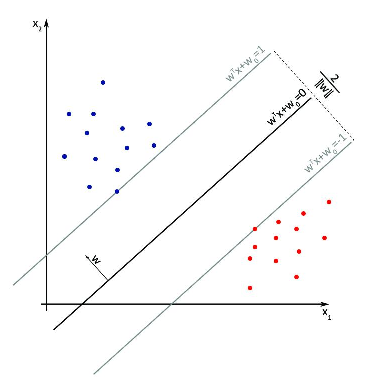

Musimy zatem znaleźć takie w, dla którego wartość  wyrażenia $\frac{2}{||w||}$ gdzie będzie maksymalna. Jest to równoważne z minimalizowaniem wyrażenia $\frac{1}{2}||w||^{2}=\frac{1}{2} w^T w$.

Nasz problem można zatem zapisać jako:

$\displaystyle{\min_w \frac{1}{2}||w||^{2}}$

Przy szukaniu tego minimum, musimy uwzględnić poniższe ograniczenia, które oznaczają, że wszystkie próbki zostały poprawnie sklasyfikowane (leżą po dobrych stronach marginesu).


$w_0 + w^T x^{(i)} \geq 1$ jeżeli $y^{(i)} = 1$

$w_0 + w^T x^{(i)} \leq -1$ jeżeli $y^{(i)} = -1$

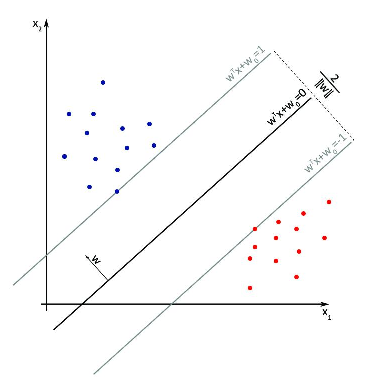

W skrócie te ograniczenia można zapisać jako:

$y^{(i)}(w_0 + w^T x^{(i)}) \geq 1$     (dla $i=1,...,N)$

Po znalezieniu odpowiednich wag $w$, algorytm mając nową obserwację o cechach $x=[x_1,...,x_d]$, sklasyfikuje ją w następujący sposób:

* $y=1 \quad \quad$  jeżeli $w^{T}x+w_0 > 0$
* $y=-1 \quad$ jeżeli $w^{T}x+w_0 < 0$

###Modyfikacja — zmienne luzu

Oczywiście zazwyczaj mamy do czynienia z przypadkiem, w którym obserwacji nie można oddzielić prostą. Z tego powodu wprowadza się w algorytmie SVM modyfikację: tak zwane **zmienne luzu** (ang. slack variables). Wprowadzamy ich tyle, ile jest obserwacji (N).

Przez $\xi^{(i)}$ oznaczmy zmienną luzu dla i-tej obserwacji. W tym przypadku rozwiązujemy poniższy problem minimalizacji:

$\displaystyle{\min_{w, \xi^{(1)},...,\xi^{(n)}} \frac{1}{2}||w||^{2}} + C \sum_{i} \xi^{(i)}$

przy ograniczeniach:

$w_0 + w^T x^{(i)} \geq 1-\xi^{(i)}$ jeżeli $y^{(i)} = 1$

$w_0 + w^T x^{(i)} \leq -1+\xi^{(i)}$ jeżeli $y^{(i)} = -1$

oraz

$\xi^{(i)} \geq 0$

Tak jak poprzednio dwa pierwsze ograniczenia można krótko zapisać jako:

$y^{(i)}(w_0 + w^T x^{(i)}) \geq 1-\xi^{(i)}$     (dla $i=1,...,N)$

Z powyższego widać, że zmienne luzu pozwalają na bycie „luźniejszym” w ograniczeniach, tzn. dopuszczają aby niektóre obserwacje przekroczyły margines albo nawet zostały źle sklasyfikowane.  

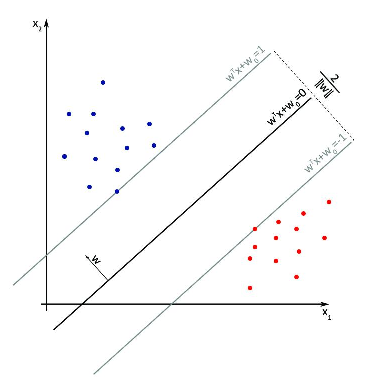

Parametr C kontroluje to jak bardzo możemy naruszyć margines.

* małe C — większe przyzwolenie na naruszenie marginesu,
* duże C — naruszenie marginesu jest bardziej karalne.

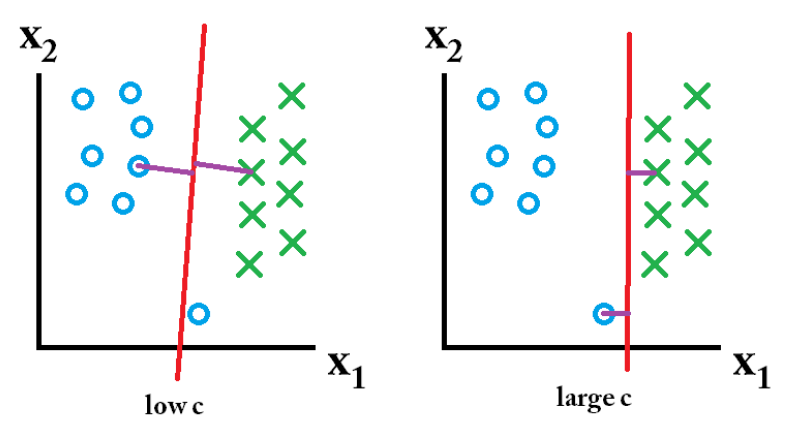

<u> Uwaga: </u> Aby poradzić sobie z danymi, których nie można oddzielić linią prostą, korzysta się również z funkcji jądrowych. Nie będziemy jednak omawiać tutaj tego podejścia.

## S3VM — Teoria

Przypomnijmy problem SVM (z modyfikacją ze zmiennymi luzu).

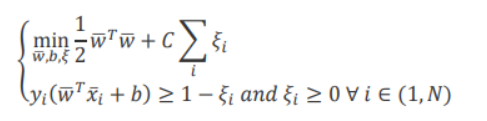

Przejdźmy teraz do  omówienia algorytmu S3VM.

 Niech:  

*  N - próbki z etykietami
*  M - próbki bez etykiet


Definiujemy funkcję celu w następujący sposób:

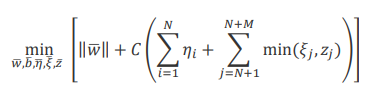

Pierwszy składnik jest identyczny jak dla standardowego SVM. W drugim wprowadzamy zmienne luzu:
* $\eta_i$ dla obserwacji z etykietami,
* $\xi_j, z_j$ dla obserwacji bez etykiet.
Modyfikacja S3VM polega na dodaniu do wyrażenia drugiej składowej, która odpowiada za błędy klasyfikacji próbek nieoznacoznych.

Wprowadzenie aż dwóch zmiennych luzu dla każdej obserwacji bez etykiet, wynika z faktu, iż nie znamy jej klasy. Dla każdej nieoznaczonej obserwacji bierzemy minimum ze zmiennych luzu, ponieważ chcemy zminimalizować błąd klasyfikacji.

Funkcja celu jest minimalizowana przy następujących ograniczeniach (autor oznaczył wyraz wolny $w_0$ przez $b$):

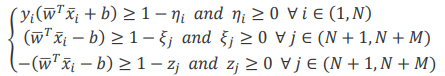


*  Pierwsze ograniczenie jest typowe dla tradycyjnego algorytmu SVM.
*  Drugie ograniczenie oblicza błąd klasyfikacji dla danych bez etykiet, gdyby punkt był w klasie 1.
*  Trzecie ograniczenie oblicza błąd klasyfikacji dla danych bez etykiet, gdyby punkt był w klasie -1.


<u> Wybór C </u>: Autorzy sugerują, żeby zacząć z większą wartością C, a później zmniejszać ją i obserwować wyniki.

Uwagi do algorytmu: autorzy sugerują, że algorytm jest najskuteczniejszy, gdy stosunek próbek oznaczonych do nieoznaczonych wynosi 1 (jest mnniej więcej tyle samo próbek oznaczonych i nieoznaczonych).

* w przypadku gdy większość próbek jest oznaczonych, prawdopodobnie zastosowanie zwykłego algorytmu uczenia nadzorującego przyniesie dobre rezultaty
* w przypadku gdy więcej jest próbek nieoznaczonych, dobrym pomysłem jest użycie klasteryzacji

Oczywiście to nie oznacza, że nie wolno używać tego algorytmu w dwóch ostatnich przypadkach, to tylko sugestia, że rezultaty wtedy mogą być gorsze.

## S3VM — przykład

Zacznijmy od stworzenia dwuwymiarowego zbioru danych, zawierającego zarówno próbki opisane, jak i nieopisane (po 50% każdego rodzaju).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.optimize import minimize

# Ustalamy losowość
np.random.seed(1000)


# Tworzymy bazę danych
from sklearn.datasets import make_classification


In [ ]:
nb_samples = 100
nb_unlabeled = 50


#Tworzone są skupiska punktów o rozkładzie normalnym (odchylenie standardowe = 1)
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_redundant=0, random_state=1000)
# n_samples - liczba próbek
# n_features - liczba cech
# n_redundant - liczba nadmiarowych cech.


make_classification dokumentacja:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

In [ ]:
#kopiujemy prawdziwe etykiety (potrzebne do rysunku na końcu)
X_test = X.copy()
Y_test= Y.copy()

Zmieniamy klasę 0 na klasę -1, a próbki nieoznakowane oznaczamy przez etykietę 0.

* Y = -1 — klasa 0
* Y = 0 — nieoznaczone
* Y = 1 — klasa 1

In [ ]:
Y[Y==0] = -1
#make_classification domyślnie tworzy klasy 0 i 1
#natomiast my potrzebujemy klas 1 i -1
Y[nb_samples - nb_unlabeled:nb_samples] = 0 # wszystkie próbki nieoznaczone mają wartości 0, a oznaczone -1 lub 1

50 ostatnich próbek traktujemy jako próbki nieoznaczone (próbki były pomieszane, więc można wziąć po prostu 50 ostatnich).

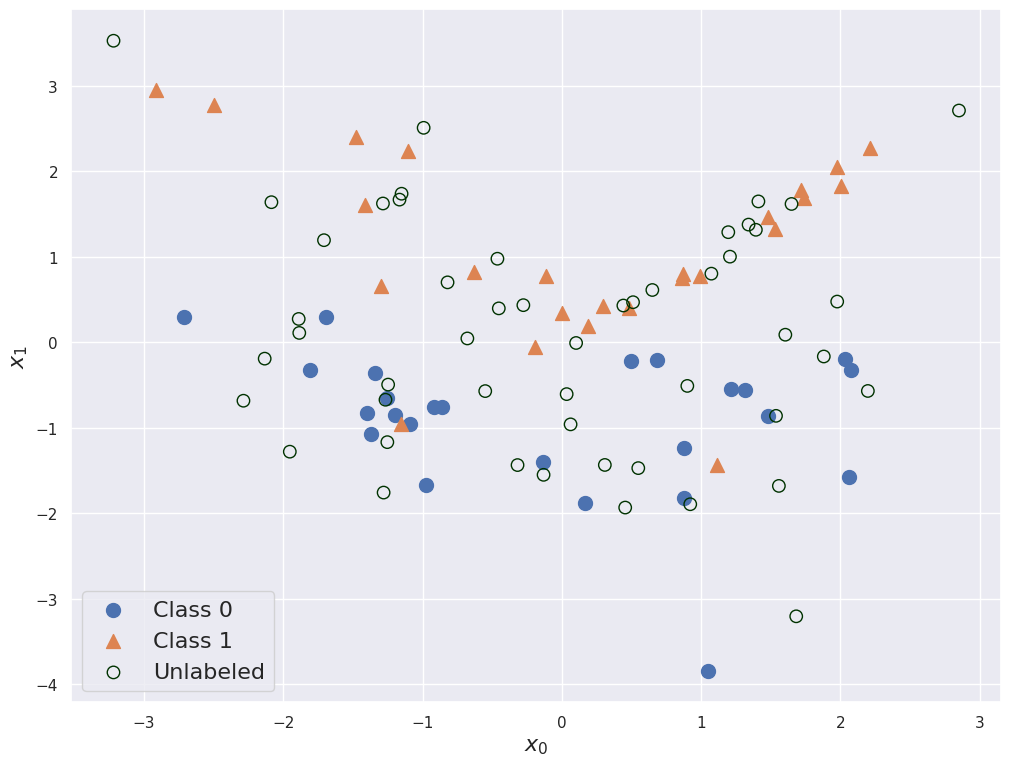

In [ ]:
# Show the initial dataset
sns.set()

fig, ax = plt.subplots(figsize=(12, 9))

ax.scatter(X[Y == -1, 0], X[Y == -1, 1], marker='o', s=100, label='Class 0')
ax.scatter(X[Y == 1, 0], X[Y == 1, 1], marker='^', s=100, label='Class 1')
ax.scatter(X[Y == 0, 0], X[Y == 0, 1], facecolor='none', edgecolor='#003200', marker='o', s=80, label='Unlabeled')

ax.set_xlabel(r'$x_0$', fontsize=16)
ax.set_ylabel(r'$x_1$', fontsize=16)
ax.grid(True)
ax.legend(fontsize=16)

plt.show()

Teraz wylosujemy zmienne potrzebne do funkcji celu (wagi oraz zmienne luzu).

In [ ]:
# inicjalizujemy zmienne S3VM. Wzór w prezentajci
#np.random.uniform - losujemy próbki z rozkładu jednostajnego.
w = np.random.uniform(-0.1, 0.1, size=X.shape[1]) #liczba wag = liczba cech = 2
eta = np.random.uniform(0.0, 0.1, size=nb_samples - nb_unlabeled) #zmienne luzu dla oznaczonych próbek
xi = np.random.uniform(0.0, 0.1, size=nb_unlabeled) #ksi
zi = np.random.uniform(0.0, 0.1, size=nb_unlabeled)
b = np.random.uniform(-0.1, 0.1, size=1)
C = 1.0 #sugestia autora
#tu random.seed z początku gwarantuje, że każdy dostanie ten sam wynik

Łączymy zmienne w jedną tablicę, ponieważ tego wymaga algorytm optymalizacyjny, którego będziemy używali.

In [ ]:
# Łączymy wszystkie zmienne w jedną tablicę
theta0 = np.hstack((w, eta, xi, zi, b))
theta0.shape

(153,)

In [ ]:
# Wektoryzujemy funkcję min()
#będzie potrzebna przy wyborze zmiennej luzu dla nieoznaczonych próbek
vmin = np.vectorize(lambda x1, x2: x1 if x1 <= x2 else x2)

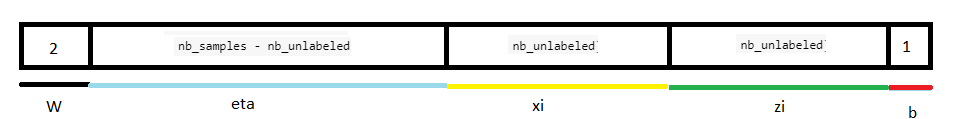

In [ ]:
# Definujemy funkcje celu
def svm_target(theta, Xd, Yd):
  #theta[0:2] - zwraca pierwsze 2 wartości wektora, .reshape - zmienia kształt tablicy, nie zmieniając jej danych
    wt = theta[0:2].reshape((Xd.shape[1], 1)) #wymiar tablicy = (2,1)

    s_eta = np.sum(theta[2:2 + nb_samples - nb_unlabeled]) #sumuje wszystkie wartości z tej tablicy ( zwraca jedną liczbę)
    s_min_xi_zi = np.sum(vmin(theta[2 + nb_samples - nb_unlabeled:2 + nb_samples], #porównuje dwie tablice i zwraca najmniejszą sumę
                              theta[2 + nb_samples:2 + nb_samples + nb_unlabeled]))

    return C * (s_eta + s_min_xi_zi) + 0.5 * np.dot(wt.T, wt)
#np.dot - iloczyn skalarny dwóch tablic
#wt.T — transpozycja wektora wt
#1/2 nie wpływa na minimalizację

Powyższy kod zwraca funkcję:

$\displaystyle{ \frac{1}{2}  w^T w + C \ ( \ \sum_{i=1}^N   \eta_i \ + \sum_{j=N+1}^{N+M} \min ( \xi_j , z_j  )  )} $


Teraz zdefiniujemy ograniczenia na zmienne luzu.

idx = i (dla której z kolei zmiennej ograniczenie)

In [ ]:
# Ograniczenie dotyczące oznakowanych punktów
def labeled_constraint(theta, Xd, Yd, idx):
    wt = theta[0:2].reshape((Xd.shape[1], 1)) #wt: tablica wymiaru (2,1)

    c = Yd[idx] * (np.dot(Xd[idx], wt) + theta[-1]) + \
        theta[2:2 + nb_samples - nb_unlabeled][idx] - 1.0

    return (c >= 0)[0]

#return (c >= 0)[0] zwraca wynik pierwszego warunku logicznego w tablicy c >= 0. Jeśli jest on spełniony (True), to funkcja zwraca True, w przeciwnym razie zwraca False.

In [ ]:
# Ograniczenia dotyczące punktów nieoznaczonych
def unlabeled_constraint_1(theta, Xd, idx):
    wt = theta[0:2].reshape((Xd.shape[1], 1))

    c = np.dot(Xd[idx], wt) - theta[-1] + \
        theta[2 + nb_samples - nb_unlabeled:2 + nb_samples][idx - nb_samples + nb_unlabeled] - 1.0
#theta[-1] to ostatni element tablicy, w tym przypadku b
#te idx po tym odjęciu będą od 1 do nb_unlabeled (theta[...] -> wycinek tablicy dotyczący tylko zmiennych luzu ksi)
    return (c >= 0)[0]

In [ ]:
def unlabeled_constraint_2(theta, Xd, idx):
    wt = theta[0:2].reshape((Xd.shape[1], 1))

    c = -(np.dot(Xd[idx], wt) - theta[-1]) + \
        theta[2 + nb_samples:2 + nb_samples + nb_unlabeled][idx - nb_samples + nb_unlabeled] - 1.0

    return (c >= 0)[0]

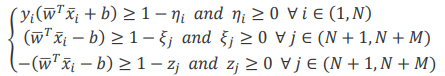

Poniższe ograniczenia: wszystkie zmienne luzu są większe lub równe 0.

In [ ]:
def eta_constraint(theta, idx):
    return theta[2:2 + nb_samples - nb_unlabeled][idx] >= 0


In [ ]:
def xi_constraint(theta, idx):
    return theta[2 + nb_samples - nb_unlabeled:2 + nb_samples][idx - nb_samples + nb_unlabeled] >= 0

In [ ]:
def zi_constraint(theta, idx):
    return theta[2 + nb_samples:2 + nb_samples+nb_unlabeled ][idx - nb_samples + nb_unlabeled] >= 0

Tworzymy listę, która będzie przechowywać ustalone ogarniczenia: (algorytm optymalizacji wymaga, aby przekazać je w takiej formie).

In [ ]:
svm_constraints = []

for i in range(nb_samples - nb_unlabeled):
        svm_constraints.append({
            'type': 'ineq', # type:ineq ograniczenie, że pewna funkcja musi być większa lub równa zeru
            'fun': labeled_constraint,  # fun -  funkcja ograniczeń
            'args': (X, Y, i)  # args - argumenty, które są przekazywane do funkcji
        })
        svm_constraints.append({
            'type': 'ineq',
            'fun': eta_constraint,
            'args': (i,)
        })
for i in range(nb_samples - nb_unlabeled, nb_samples):
        svm_constraints.append({
            'type': 'ineq',
            'fun': unlabeled_constraint_1,
            'args': (X, i)
        })
        svm_constraints.append({
            'type': 'ineq',
            'fun': unlabeled_constraint_2,
            'args': (X, i)
        })
        svm_constraints.append({
            'type': 'ineq',
            'fun': xi_constraint,
            'args': (i,)
        })
        svm_constraints.append({
            'type': 'ineq',
            'fun': zi_constraint,
            'args': (i,)
        })


Każde ograniczenie jest reprezentowane za pomocą słownika, gdzie type jest ustawione na 'ineq', aby wskazać, że jest to ograniczenie nierówności, fun wskazuje na obiekt, który można wywołać, a args zawiera wszystkie dodatkowe argumenty (theta to główna zmienna x i jest automatycznie dodawana).

Teraz optymalizujemy funkcję celu.

In [ ]:
# Optymalizujemy funkcję celu
print('Optimizing...')
result = minimize(fun=svm_target,
                      x0=theta0,
                      constraints=svm_constraints,
                      args=(X, Y),
                      method="COBYLA",
                      tol=0.0001,
                      options={
                          "maxiter": 5000,
                      })

#czas kompilacji: 1min 45sek

Optimizing...


In [ ]:
result

 message: Maximum number of function evaluations has been exceeded.
 success: False
  status: 2
     fun: -13488.744193961427
       x: [-3.887e+00  2.785e-01 ... -1.451e+02  4.180e-01]
    nfev: 5000
   maxcv: -0.0

Przy użyciu biblioteki SciPy można minimalizować cel, stosując zarówno algorytm Sequential Least Squares Programming (SLSQP), jak i Constraint Optimization by Linear Approximation (COBYLA).My wybraliśmy ten drugi. Aby ograniczyć liczbę iteracji, ustawiliśmy również opcjonalny parametr słownika 'maxiter': 5000.

Po zakończeniu procesu uczenia możemy sklasyfikować nieoznaczone obserwacje.

In [ ]:
# Wyodrębniamy ostatnie parametry
theta_end = result['x']
w = theta_end[0:2]
b = theta_end[-1]

Xu = X[nb_samples - nb_unlabeled:nb_samples] #cechy próbek nieoznaczonych
yu = -np.sign(np.dot(Xu, w) + b) #przypisanie etykiet próbkom nieoznaczonym
# np.sign - zwraca: -1 gdy element tablicy <0, 1 gdy element >0 i 0 gdy element =0


Na następnym wykresie można porównać początkowy wykres (po lewej) z końcowym, gdzie wszystkim punktom przypisano etykiety (po prawej).

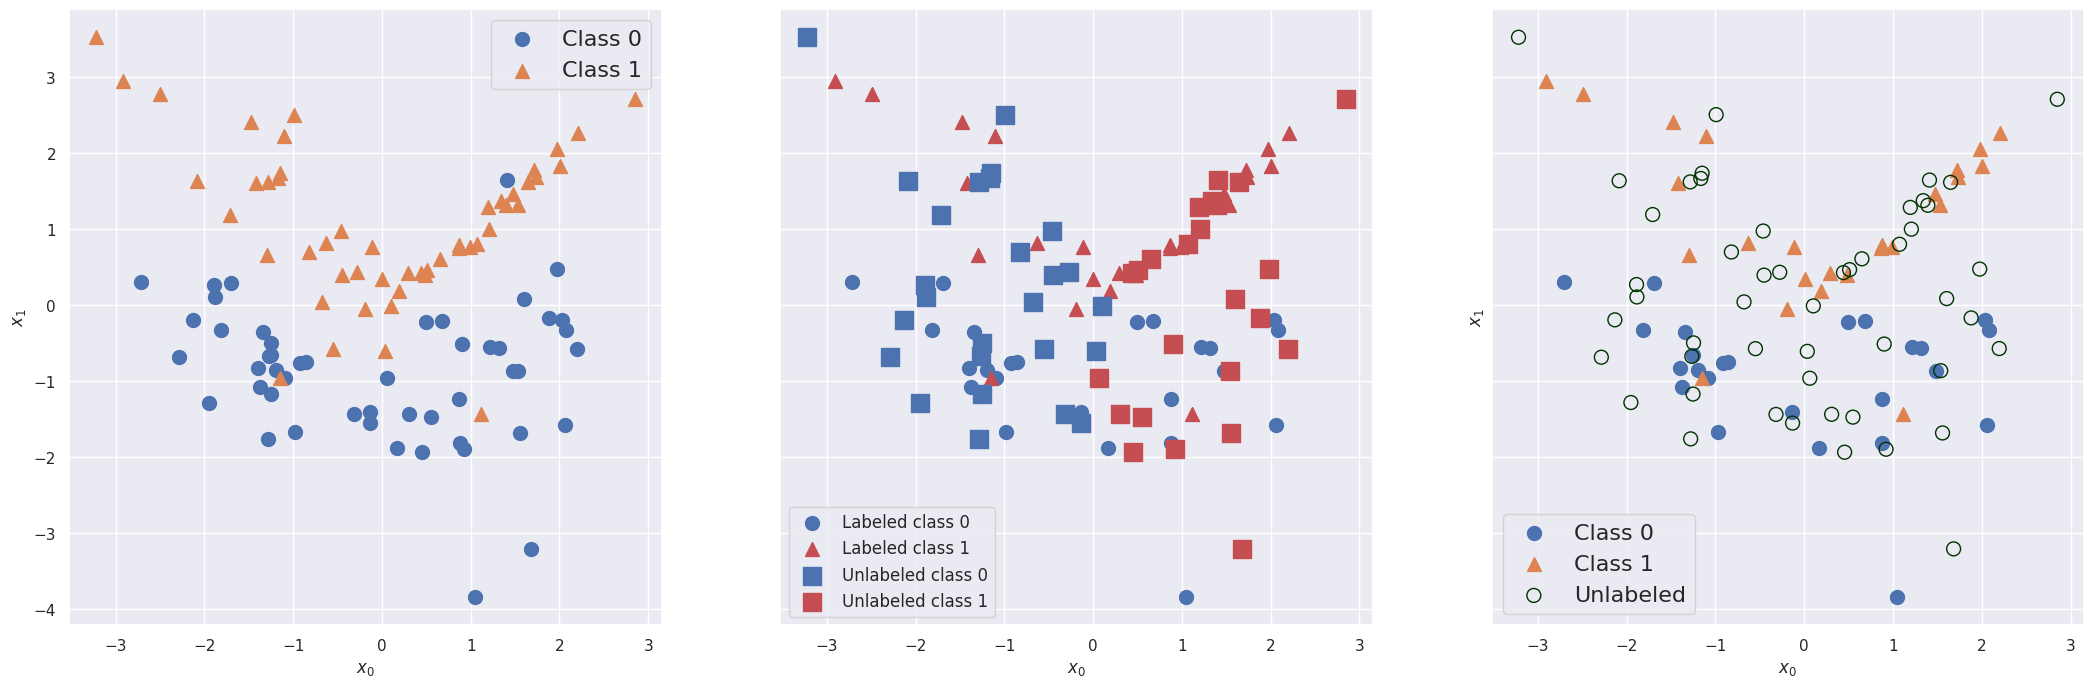

In [ ]:
# Show the final plots
fig, ax = plt.subplots(1, 3, figsize=(26, 8), sharey=True)


ax[0].scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], marker='o', s=100, label='Class 0')
ax[0].scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], marker='^', s=100, label='Class 1')

ax[0].set_xlabel(r'$x_0$', fontsize=12)
ax[0].set_ylabel(r'$x_1$', fontsize=12)
ax[0].grid(True)
ax[0].legend(fontsize=16)

ax[1].scatter(X[Y == -1, 0], X[Y == -1, 1], c='b', marker='o', s=100, label='Labeled class 0')
ax[1].scatter(X[Y == 1, 0], X[Y == 1, 1], c='r', marker='^', s=100, label='Labeled class 1')

ax[1].scatter(Xu[yu == -1, 0], Xu[yu == -1, 1], c='b',  marker='s', s=150, label='Unlabeled class 0')
ax[1].scatter(Xu[yu == 1, 0], Xu[yu == 1, 1], c='r', marker='s', s=150, label='Unlabeled class 1')

ax[1].set_xlabel(r'$x_0$', fontsize=12)
ax[1].grid(True)
ax[1].legend(fontsize=12)

ax[2].scatter(X[Y == -1, 0], X[Y == -1, 1], marker='o', s=100, label='Class 0')
ax[2].scatter(X[Y == 1, 0], X[Y == 1, 1], marker='^', s=100, label='Class 1')
ax[2].scatter(X[Y == 0, 0], X[Y == 0, 1], facecolor='none', edgecolor='#003200', marker='o', s=100,
                  label='Unlabeled')

ax[2].set_xlabel(r'$x_0$', fontsize=12)
ax[2].set_ylabel(r'$x_1$', fontsize=12)
ax[2].grid(True)
ax[2].legend(fontsize=16)


plt.show()

Jak widać, większość próbek została sklasyfikowana poprawnie. Niestety, problem nie jest liniowo separowalny. Ostateczna konfiguracja ma tendencję do karykatury próbek klasy 1 poniżej ukośnej linii separacji (dominujący klaster to rozciągnięty klaster w górno-prawym kwadrancie).

## S3VM — podsumowanie


S3VM to bardzo potężne podejście, które oferuje dużą elastyczność w dostosowywaniu się do różnych scenariuszy. Jest szczególnie odpowiednie, gdy struktura próbek nieoznaczonych jest częściowo (lub nawet całkowicie) nieznana, a główną odpowiedzialność za etykietowanie musi być przypisana próbkom oznaczonym.

# Transdukcyjne maszyny wektorów nośnych (TSVM)

## TSVM — Teoria

TSVM to kolejny algorytm będący modyfikacją SVM. Ponownie zakładamy, że mamy:
* N oznakowanych próbek,
* M nieoznakowanych próbek.


W tym przypadku funkcja celu ma postać:

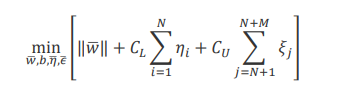

gdzie:
* $\eta_i$ to zmienne luzu dotyczące danych oznakowanych
* $\xi_i$ to zmienne luzu dotyczące danych nieoznakowanych

przy ograniczeniach:


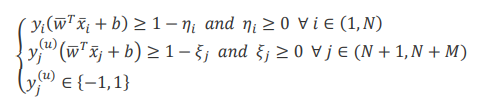


* pierwsze ograniczenie odnosi się do danych oznaczonych
* drugie ograniczenie odnosi się do danych nieoznaczonych
* trzeci warunek odnosi się do etykiet danych nieoznaczonych

Za pomocą stałych $C_L$ i $C_U$ możemy decydować, jak bardzo ufamy próbkom oznaczonym. (duże $C_L$ — bardziej ufamy próbkom oznaczonym).

Autor sugeruje, by używać tego algorytmu w przypadkach, gdy nie ma dużo szumu w nieoznakowanych danych.

Przykład: Gdy wszystkie dane są rejestrowane przez to samo urządzenie pomiarowe (np. medyczne zdjęcia wykonane przez tę samą aparaturę).

## TSVM — Przykład

TSVM jest bardziej efektywny niż standardowe SVM nadzorowane, gdy zestaw testowy (nieoznaczony) jest duży, a zestaw treningowy (oznaczony) jest stosunkowo mały.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns #Seaborn - biblioteka do tworzenia grafik statystycznych

from scipy.optimize import minimize

from sklearn.datasets import make_classification

np.random.seed(1000)

nb_samples = 200
nb_unlabeled = 150 #ustalamy liczbę danych nieoznaczonych na 150

In [ ]:
# Tworzymy bazę danych:
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_redundant=0, random_state=1000)

In [ ]:
X_test = X.copy()
Y_test = Y.copy()
#kopiuję wartości cech i etykiety do końcowego wykresu

In [ ]:
Y[Y==0] = -1  #  warotści 0 zmieniamy na -1
Y[nb_samples - nb_unlabeled:nb_samples] = 0 # czyścimy etykiety dla nieoznaczoncy danych i segregujemy je jako ostatnie 150

Odpowiadający wykres jest przedstawiony na poniższym rysunku:

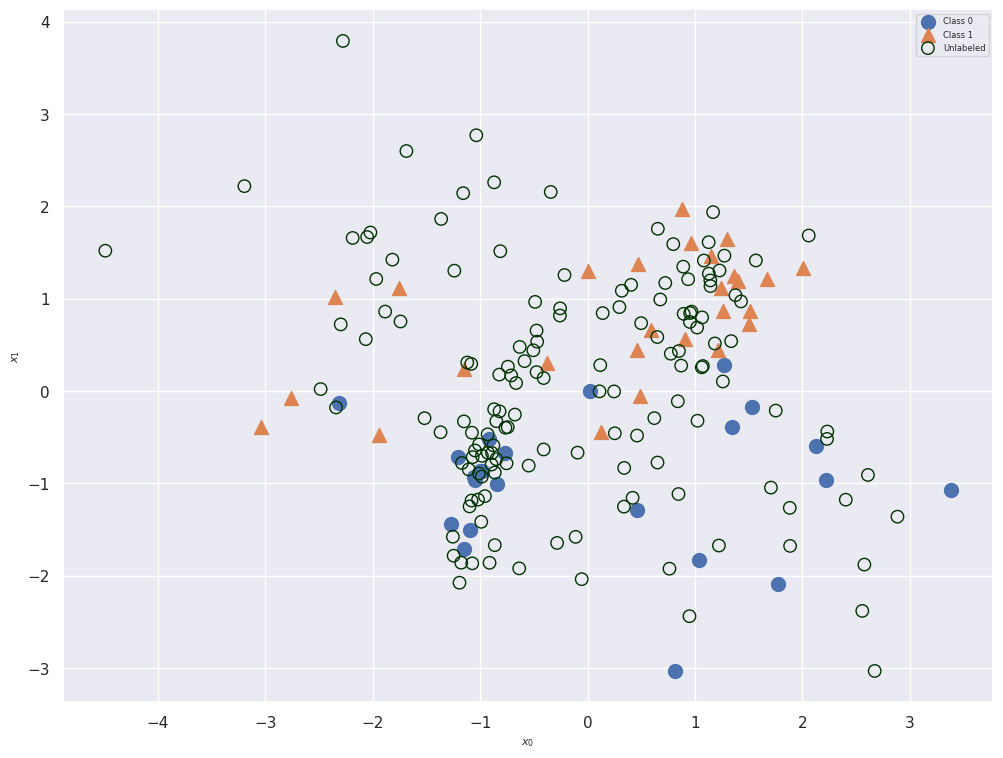

In [ ]:
# Show the initial dataset
sns.set()

fig, ax = plt.subplots(figsize=(12, 9))

ax.scatter(X[Y == -1, 0], X[Y == -1, 1], marker='o', s=100, label='Class 0')
ax.scatter(X[Y == 1, 0], X[Y == 1, 1], marker='^', s=100, label='Class 1')
ax.scatter(X[Y == 0, 0], X[Y == 0, 1], facecolor='none', edgecolor='#003200', marker='o', s=80, label='Unlabeled')

ax.set_xlabel(r'$x_0$', fontsize=8)
ax.set_ylabel(r'$x_1$', fontsize=8)
ax.grid(True)
ax.legend(fontsize=6)

plt.show()


Procedura jest podobna do tej, którą stosowaliśmy wcześniej. Po pierwsze, musimy zainicjować nasze zmienne.

In [ ]:

# Ustalamy zmienne do TSVM
w = np.random.uniform(-0.1, 0.1, size=X.shape[1])
eta_labeled = np.random.uniform(0.0, 0.1, size=nb_samples - nb_unlabeled)
eta_unlabeled = np.random.uniform(0.0, 0.1, size=nb_unlabeled)
y_unlabeled = np.random.uniform(-1.0, 1.0, size=nb_unlabeled)
b = np.random.uniform(-0.1, 0.1, size=1)

C_labeled = 2 # ważniejsze są etykiety próbek oznaczonych
C_unlabeled = 0.1


# Łączymy wszystkie zmienne w jednym wektorze
theta0 = np.hstack((w, eta_labeled, eta_unlabeled, y_unlabeled, b))


Używamy wartości 2.0 dla C_labeled i 0.1 dla C_unlabeled, ponieważ chcemy bardziej uwzględniać wskazówki ze strony próbek oznaczonych niż strukturę próbek nieoznaczonych.

Definiujemy funkcję celu:

In [ ]:
def svm_target(theta, Xd, Yd):
    wt = theta[0:2].reshape((Xd.shape[1], 1))

    s_eta_labeled = np.sum(theta[2:2 + nb_samples - nb_unlabeled])
    s_eta_unlabeled = np.sum(theta[2 + nb_samples - nb_unlabeled:2 + nb_samples])

    return (C_labeled * s_eta_labeled) + (C_unlabeled * s_eta_unlabeled) + (0.5 * np.dot(wt.T, wt))

$\displaystyle{ \frac{1}{2}  w^T w + C_L  \ \sum_{i-1}^N   \eta_i \ +
 C_U \sum_{j=N+1}^{N+M} \ \ \xi_j }   $


Ograniczenia dla próbek oznaczonych i nieoznaczonych:

In [ ]:
def labeled_constraint(theta, Xd, Yd, idx):
    wt = theta[0:2].reshape((Xd.shape[1], 1))

    c = Yd[idx] * (np.dot(Xd[idx], wt) + theta[-1]) + \
        theta[2:2 + nb_samples - nb_unlabeled][idx] - 1.0

    return int((c >= 0)[0])


def unlabeled_constraint(theta, Xd, idx):
    wt = theta[0:2].reshape((Xd.shape[1], 1))

    c = theta[2 + nb_samples:2 + nb_samples + nb_unlabeled][idx - nb_samples + nb_unlabeled] * \
        (np.dot(Xd[idx], wt) + theta[-1]) + \
        theta[2 + nb_samples - nb_unlabeled:2 + nb_samples][idx - nb_samples + nb_unlabeled] - 1.0

    return int((c >= 0)[0])



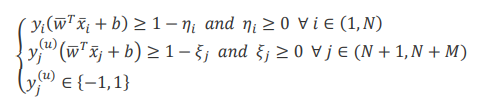


Zmienne luzu muszą być większe lub równe 0:

In [ ]:
def eta_labeled_constraint(theta, idx):
    return int(theta[2:2 + nb_samples - nb_unlabeled][idx] >= 0)


def eta_unlabeled_constraint(theta, idx):
    return int(theta[2 + nb_samples - nb_unlabeled:2 + nb_samples][idx - nb_samples + nb_unlabeled] >= 0)




Podobnie jak w poprzednim przykładzie, tworzymy słownik z ograniczeniami wymaganymi przez SciPy:

In [ ]:
svm_constraints = []

for i in range(nb_samples - nb_unlabeled):
        svm_constraints.append({
            'type': 'ineq',
            'fun': labeled_constraint,
            'args': (X, Y, i)
        })
        svm_constraints.append({
            'type': 'ineq',
            'fun': eta_labeled_constraint,
            'args': (i,)
        })

for i in range(nb_samples - nb_unlabeled, nb_samples):
        svm_constraints.append({
            'type': 'ineq',
            'fun': unlabeled_constraint,
            'args': (X, i)
        })
        svm_constraints.append({
            'type': 'ineq',
            'fun': eta_unlabeled_constraint,
            'args': (i,)
        })


Po zdefiniowaniu wszystkich ograniczeń możemy zminimalizować funkcję celu, używając metody 'SLSQP' i opcji słownika 'maxiter': 2000. Zazwyczaj zbieżność jest osiągana w mniejszej liczbie iteracji, ale w tym przypadku przyjęliśmy założenia, jakbyśmy pracowali w bardziej ogólnym scenariuszu.

In [ ]:
# Optymalizacja funckji celu
print('Optimizing...')
result = minimize(fun=svm_target,
                      x0=theta0,
                      constraints=svm_constraints,
                      args=(X, Y),
                      method='SLSQP',
                      tol=0.0001,
                      options={'maxiter': 2000})
print(result['message'])

Optimizing...
Singular matrix E in LSQ subproblem


In [ ]:
result

 message: Singular matrix E in LSQ subproblem
 success: False
  status: 5
     fun: -3.970944084522778e+31
       x: [ 1.029e+16 -5.238e+14 ...  5.626e-01  5.562e-02]
     nit: 58
     jac: [ 1.029e+16 -5.238e+14 ...  0.000e+00  0.000e+00]
    nfev: 20532
    njev: 58

Gdy proces zostanie zakończony, możemy obliczyć etykiety dla próbek nieoznaczonych i porównać wykresy.

In [ ]:
theta_end = result['x']
w = theta_end[0:2]
b = theta_end[-1]

Xu = X[nb_samples - nb_unlabeled:nb_samples]
yu = -np.sign(np.dot(Xu, w) + b)

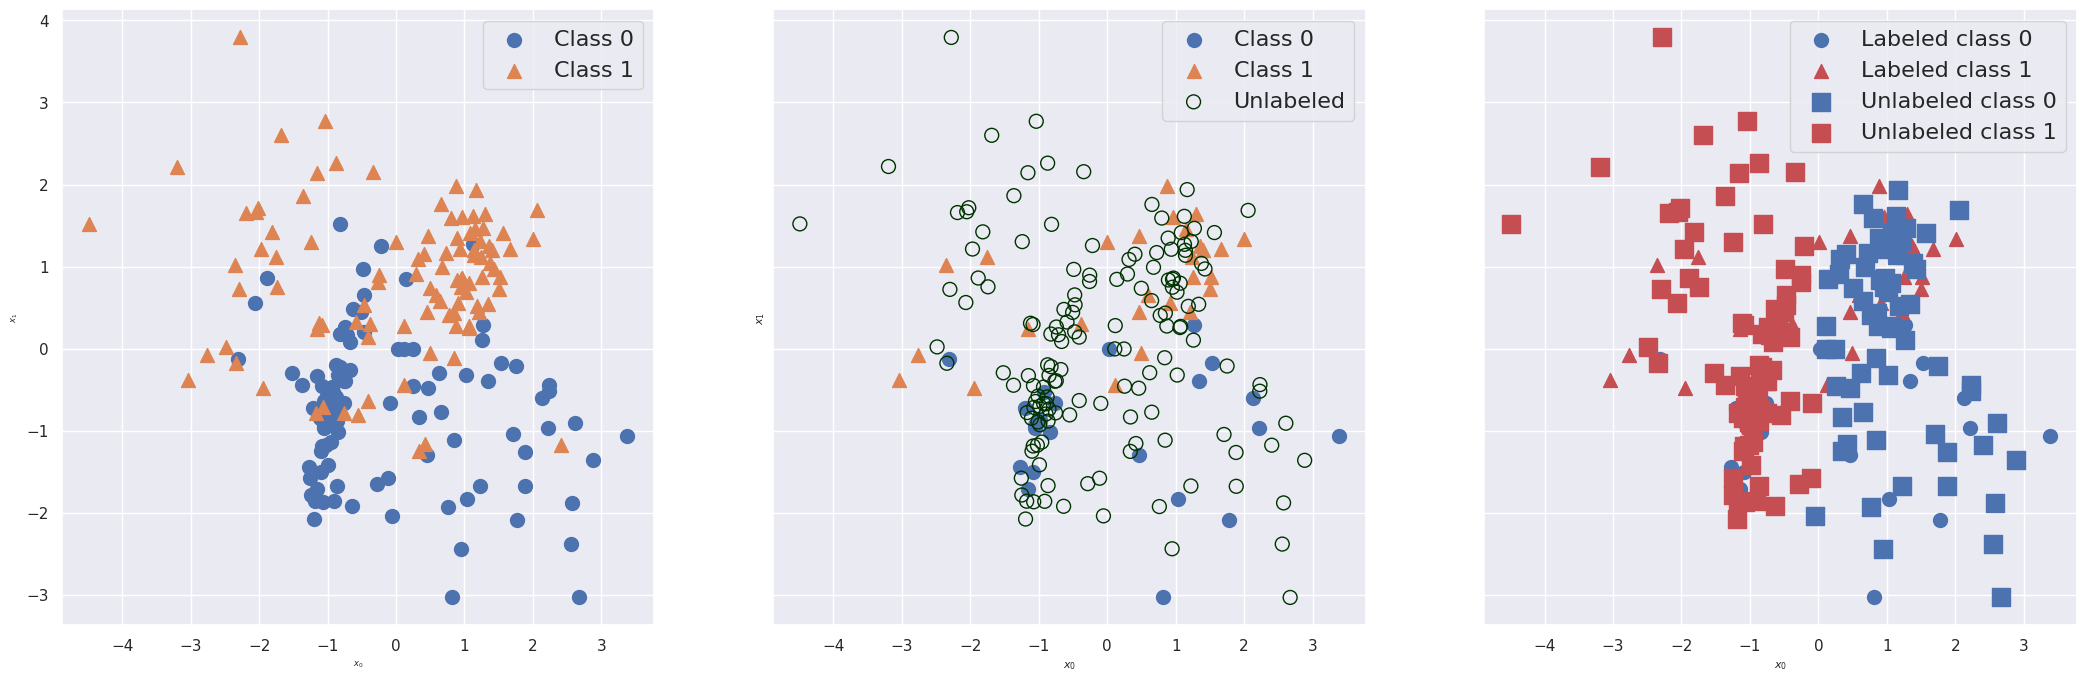

In [ ]:

# Końcowy wykres:
fig, ax = plt.subplots(1, 3, figsize=(26, 8), sharey=True)

ax[0].scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], marker='o', s=100, label='Class 0')
ax[0].scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], marker='^', s=100, label='Class 1')


ax[0].set_xlabel(r'$x_0$', fontsize=6)
ax[0].set_ylabel(r'$x_1$', fontsize=6)
ax[0].grid(True)
ax[0].legend(fontsize=16)

ax[1].scatter(X[Y == -1, 0], X[Y == -1, 1], marker='o', s=100, label='Class 0')
ax[1].scatter(X[Y == 1, 0], X[Y == 1, 1], marker='^', s=100, label='Class 1')
ax[1].scatter(X[Y == 0, 0], X[Y == 0, 1], facecolor='none', edgecolor='#003200', marker='o', s=100, label='Unlabeled')

ax[1].set_xlabel(r'$x_0$', fontsize=8)
ax[1].set_ylabel(r'$x_1$', fontsize=8)
ax[1].grid(True)
ax[1].legend(fontsize=16)

ax[2].scatter(X[Y == -1, 0], X[Y == -1, 1], c='b', marker='o', s=100, label='Labeled class 0')
ax[2].scatter(X[Y == 1, 0], X[Y == 1, 1], c='r', marker='^', s=100, label='Labeled class 1')

ax[2].scatter(Xu[yu == -1, 0], Xu[yu == -1, 1], c='b', marker='s', s=150, label='Unlabeled class 0')
ax[2].scatter(Xu[yu == 1, 0], Xu[yu == 1, 1], c='r', marker='s', s=150, label='Unlabeled class 1')

ax[2].set_xlabel(r'$x_0$', fontsize=8)
ax[2].grid(True)
ax[2].legend(fontsize=16)

plt.show()

Inny wynik niż w książce!

Algorytm przy oddzielaniu zasugerował się mocno skupiskiem klasy 1 w prawej górnej części (żółte trójkąty) i skupiskiem klasy 0 (niebieskie kółka).

Porównamy teraz 3 algorytmy:
* SVM
* TSVM z $C_L = 10$ i $C_U = 0.1$
* TSVM z $C_L = 0.1$ i $C_U = 10$

## SVM

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.svm import SVC

Tworzymy nowy zbiór danych.

In [ ]:
np.random.seed(1000)

nb_samples = 100
nb_unlabeled = 90



X, Y = make_classification(n_samples=nb_samples, n_features=2, n_redundant=0, random_state=100)
X_test = X.copy()
Y_test = Y.copy()
Y[Y==0] = -1
Y[nb_samples - nb_unlabeled:nb_samples] = 0

Wykres danych.

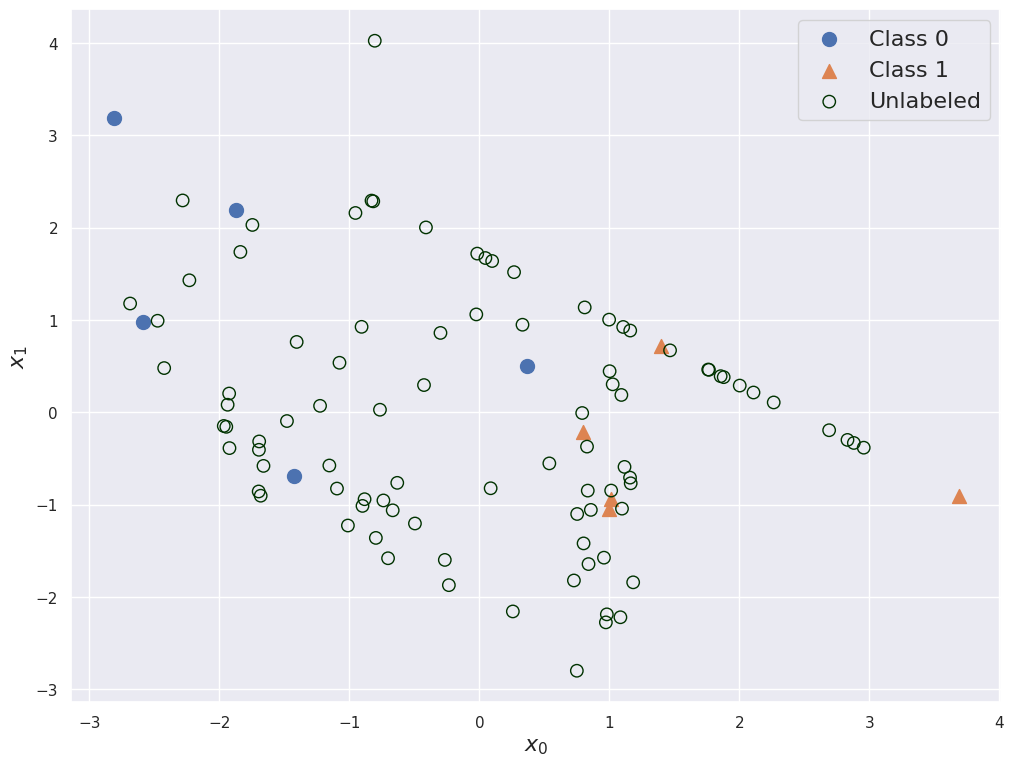

In [ ]:
sns.set()

fig, ax = plt.subplots(figsize=(12, 9))

ax.scatter(X[Y == -1, 0], X[Y == -1, 1], marker='o', s=100, label='Class 0')
ax.scatter(X[Y == 1, 0], X[Y == 1, 1], marker='^', s=100, label='Class 1')
ax.scatter(X[Y == 0, 0], X[Y == 0, 1], facecolor='none', edgecolor='#003200', marker='o', s=80, label='Unlabeled')

ax.set_xlabel(r'$x_0$', fontsize=16)
ax.set_ylabel(r'$x_1$', fontsize=16)
ax.grid(True)
ax.legend(fontsize=16)

plt.show()


Trenujemy SVM i dokonujemy predykcji.

In [ ]:
svc = SVC(kernel='linear', C=1.0)
svc.fit(X[Y != 0], Y[Y != 0])

Xu_svc = X[nb_samples - nb_unlabeled:nb_samples]
yu_svc = svc.predict(Xu_svc)

Rysujemy wyniki.

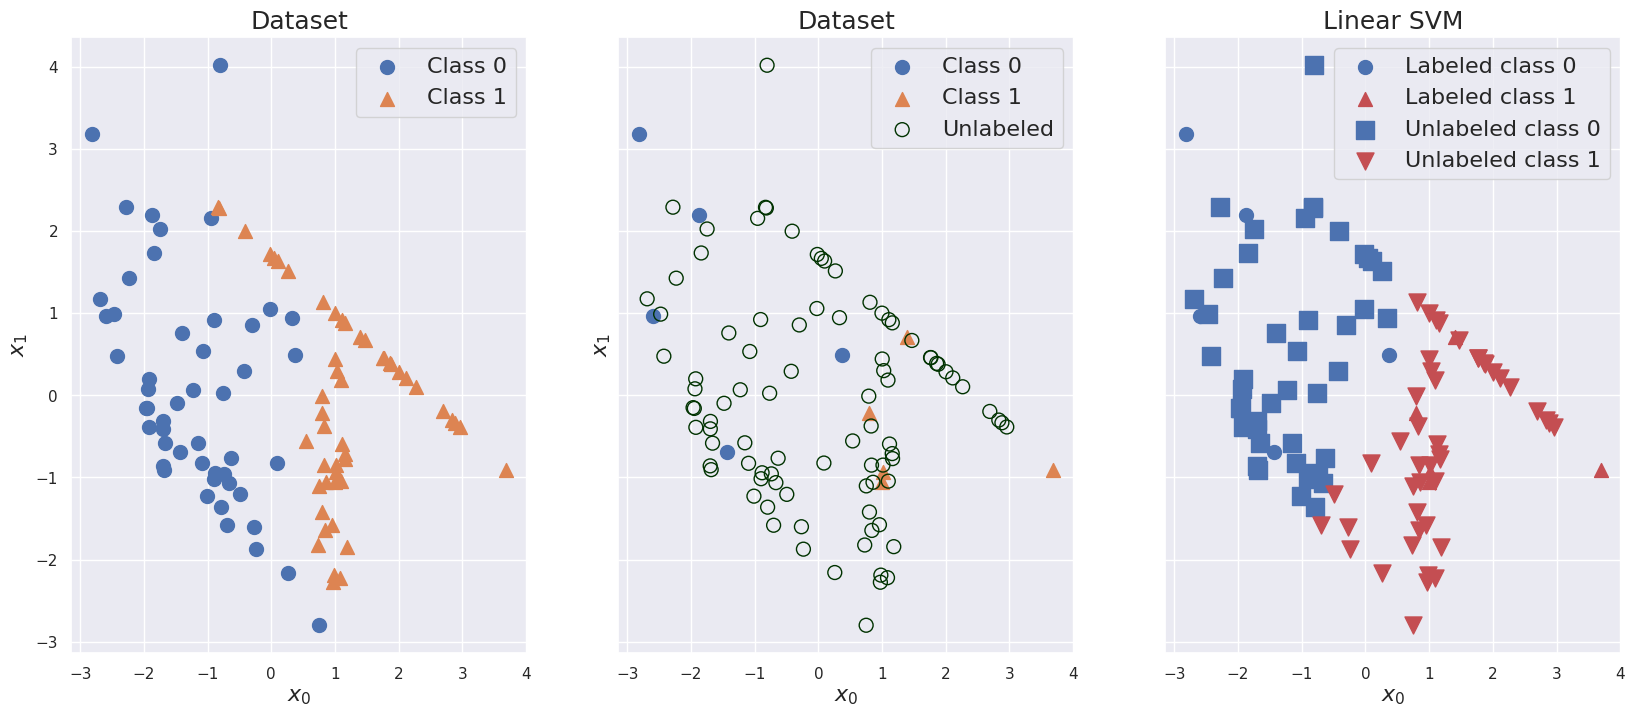

In [ ]:
# Show the final plots
fig, ax = plt.subplots(1, 3, figsize=(20, 8), sharey=True)

ax[0].scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], marker='o', s=100, label='Class 0')
ax[0].scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], marker='^', s=100, label='Class 1')


ax[0].set_xlabel(r'$x_0$', fontsize=16)
ax[0].set_ylabel(r'$x_1$', fontsize=16)
ax[0].set_title('Dataset', fontsize=18)
ax[0].grid(True)
ax[0].legend(fontsize=16)

ax[1].scatter(X[Y == -1, 0], X[Y == -1, 1], marker='o', s=100, label='Class 0')
ax[1].scatter(X[Y == 1, 0], X[Y == 1, 1], marker='^', s=100, label='Class 1')
ax[1].scatter(X[Y == 0, 0], X[Y == 0, 1], facecolor='none', edgecolor='#003200', s=100, label='Unlabeled')

ax[1].set_xlabel(r'$x_0$', fontsize=16)
ax[1].set_ylabel(r'$x_1$', fontsize=16)
ax[1].set_title('Dataset', fontsize=18)
ax[1].grid(True)
ax[1].legend(fontsize=16)

ax[2].scatter(X[Y == -1, 0], X[Y == -1, 1], c='b', marker='o', s=100, label='Labeled class 0')
ax[2].scatter(X[Y == 1, 0], X[Y == 1, 1], c='r', marker='^', s=100, label='Labeled class 1')

ax[2].scatter(Xu_svc[yu_svc == -1, 0], Xu_svc[yu_svc == -1, 1], c='b', marker='s', s=150, label='Unlabeled class 0')
ax[2].scatter(Xu_svc[yu_svc == 1, 0], Xu_svc[yu_svc == 1, 1], c='r', marker='v', s=150, label='Unlabeled class 1')

ax[2].set_xlabel(r'$x_0$', fontsize=16)
ax[2].set_title('Linear SVM', fontsize=18)
ax[2].grid(True)
ax[2].legend(fontsize=16)

plt.show()

Jest niewiele (10) danych oznaczonych, które są liniowo separowalne.

## C_L =1, C_U = 10

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.optimize import minimize

from sklearn.datasets import make_classification

Tworzymy zbiór danych (ten sam co przy SVM).

In [ ]:

np.random.seed(1000)

nb_samples = 100
nb_unlabeled = 90

X, Y = make_classification(n_samples=nb_samples, n_features=2, n_redundant=0, random_state=100)
X_test = X.copy()
Y_test = Y.copy()
Y[Y==0] = -1
Y[nb_samples - nb_unlabeled:nb_samples] = 0

Wykres.

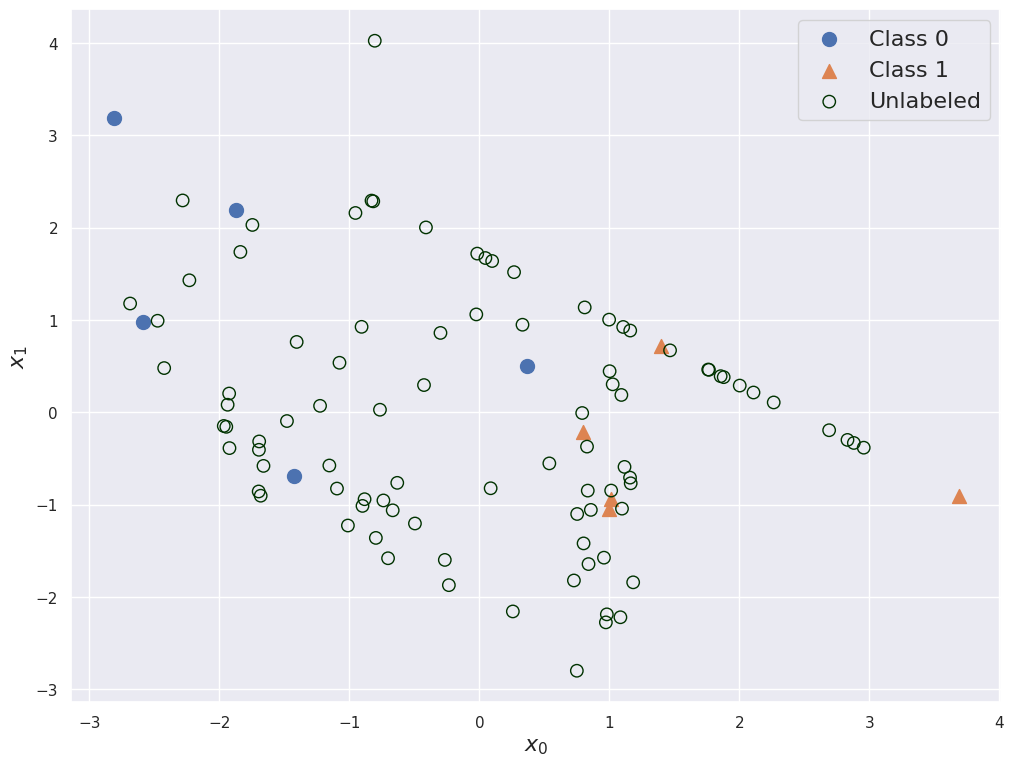

In [ ]:
sns.set()

fig, ax = plt.subplots(figsize=(12, 9))

ax.scatter(X[Y == -1, 0], X[Y == -1, 1], marker='o', s=100, label='Class 0')
ax.scatter(X[Y == 1, 0], X[Y == 1, 1], marker='^', s=100, label='Class 1')
ax.scatter(X[Y == 0, 0], X[Y == 0, 1], facecolor='none', edgecolor='#003200', marker='o', s=80, label='Unlabeled')

ax.set_xlabel(r'$x_0$', fontsize=16)
ax.set_ylabel(r'$x_1$', fontsize=16)
ax.grid(True)
ax.legend(fontsize=16)

plt.show()

Inicjalizujemy zmienne do TSVM.

In [ ]:
w = np.random.uniform(-0.1, 0.1, size=X.shape[1])
eta_labeled = np.random.uniform(0.0, 0.1, size=nb_samples - nb_unlabeled)
eta_unlabeled = np.random.uniform(0.0, 0.1, size=nb_unlabeled)
y_unlabeled = np.random.uniform(-1.0, 1.0, size=nb_unlabeled)
b = np.random.uniform(-0.1, 0.1, size=1)

C_labeled = 1
C_unlabeled = 10

#dajemy wszystkie zmienne do jednej tablicy
theta0 = np.hstack((w, eta_labeled, eta_unlabeled, y_unlabeled, b))

Funkcja do optymalizacji.

In [ ]:
def svm_target(theta, Xd, Yd):
    wt = theta[0:2].reshape((Xd.shape[1], 1))

    s_eta_labeled = np.sum(theta[2:2 + nb_samples - nb_unlabeled])
    s_eta_unlabeled = np.sum(theta[2 + nb_samples - nb_unlabeled:2 + nb_samples])

    return (C_labeled * s_eta_labeled) + (C_unlabeled * s_eta_unlabeled) + (0.5 * np.dot(wt.T, wt))

Definiujemy ograniczenia.

In [ ]:
def labeled_constraint(theta, Xd, Yd, idx):
    wt = theta[0:2].reshape((Xd.shape[1], 1))

    c = Yd[idx] * (np.dot(Xd[idx], wt) + theta[-1]) + \
        theta[2:2 + nb_samples - nb_unlabeled][idx] - 1.0

    return int((c >= 0)[0])


def unlabeled_constraint(theta, Xd, idx):
    wt = theta[0:2].reshape((Xd.shape[1], 1))

    c = theta[2 + nb_samples:2 + nb_samples + nb_unlabeled][idx - nb_samples + nb_unlabeled] * \
        (np.dot(Xd[idx], wt) + theta[-1]) + \
        theta[2 + nb_samples - nb_unlabeled:2 + nb_samples][idx - nb_samples + nb_unlabeled] - 1.0

    return int((c >= 0)[0])

In [ ]:
def eta_labeled_constraint(theta, idx):
    return int(theta[2:2 + nb_samples - nb_unlabeled][idx] >= 0)


def eta_unlabeled_constraint(theta, idx):
    return int(theta[2 + nb_samples - nb_unlabeled:2 + nb_samples][idx - nb_samples + nb_unlabeled] >= 0)


Tworzymy listę z ograniczeniami.

In [ ]:
svm_constraints = []

for i in range(nb_samples - nb_unlabeled):
        svm_constraints.append({
            'type': 'ineq',
            'fun': labeled_constraint,
            'args': (X, Y, i)
        })
        svm_constraints.append({
            'type': 'ineq',
            'fun': eta_labeled_constraint,
            'args': (i,)
        })

for i in range(nb_samples - nb_unlabeled, nb_samples):
        svm_constraints.append({
            'type': 'ineq',
            'fun': unlabeled_constraint,
            'args': (X, i)
        })
        svm_constraints.append({
            'type': 'ineq',
            'fun': eta_unlabeled_constraint,
            'args': (i,)
        })


Optymalizujemy.

In [ ]:
print('Optimizing...')
result = minimize(fun=svm_target,
                      x0=theta0,
                      constraints=svm_constraints,
                      args=(X, Y),
                      method='SLSQP',
                      tol=0.0001,
                      options={'maxiter': 2000})

Optimizing...


In [ ]:
result

 message: Singular matrix E in LSQ subproblem
 success: False
  status: 5
     fun: -1.3565329983728123e+35
       x: [ 4.141e+13  6.354e+13 ...  2.216e-01 -4.200e-02]
     nit: 47
     jac: [ 2.989e+13  5.845e+13 ...  0.000e+00  0.000e+00]
    nfev: 9118
    njev: 47

Dokonujemy predykcji.

In [ ]:
theta_end = result['x']
w = theta_end[0:2]
b = theta_end[-1]

Xu = X[nb_samples - nb_unlabeled:nb_samples]
yu = -np.sign(np.dot(Xu, w) + b)

Wykres dla porównania.

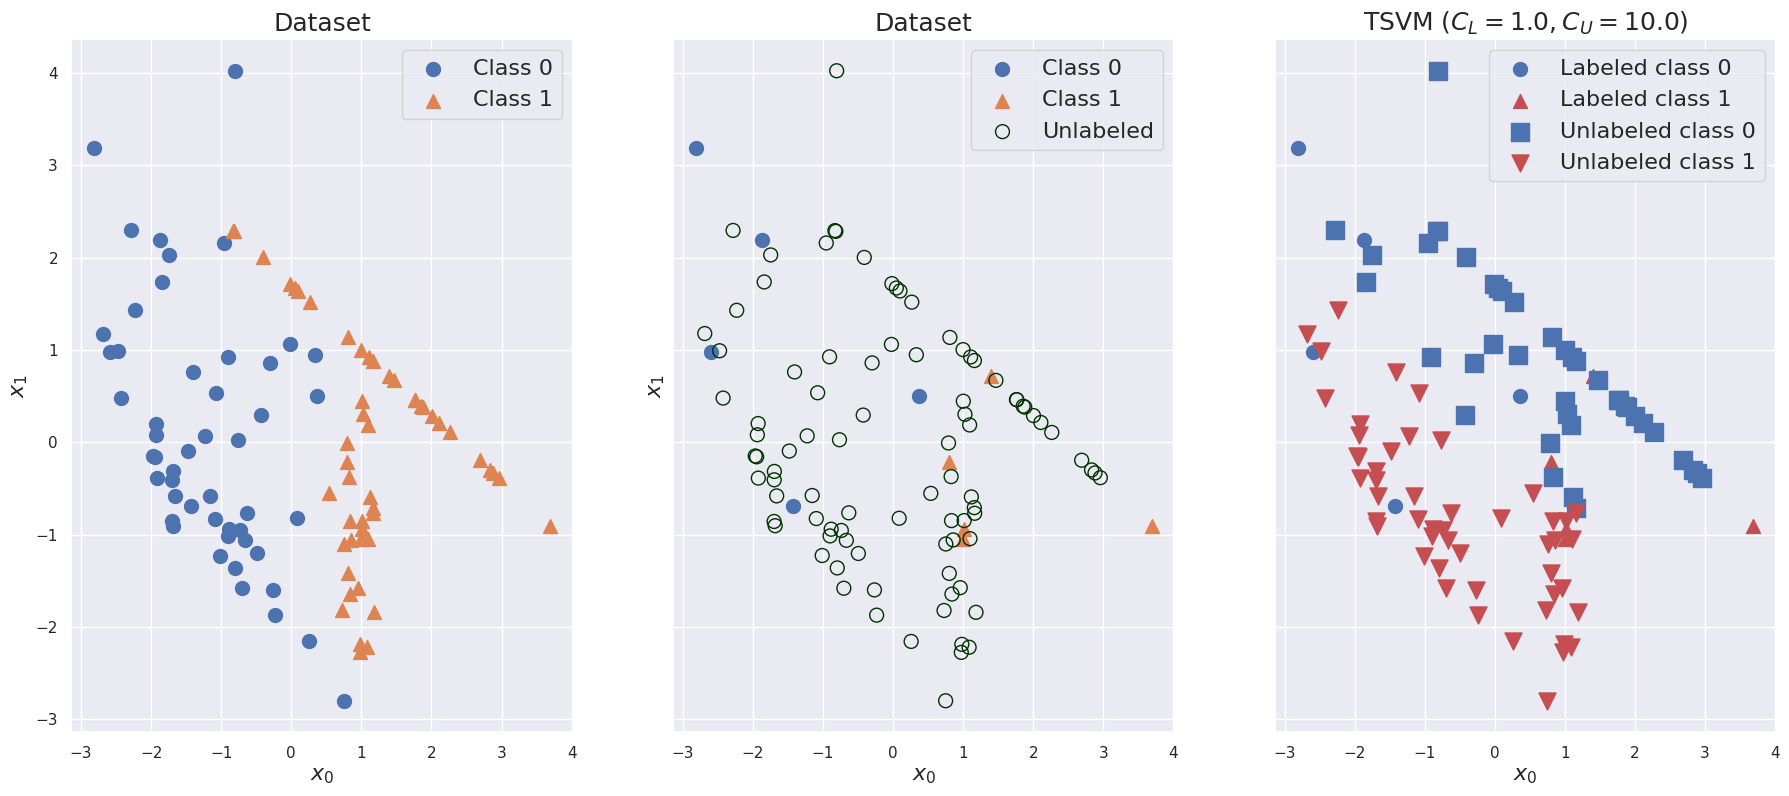

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(22, 9), sharey=True)

ax[0].scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], marker='o', s=100, label='Class 0')
ax[0].scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], marker='^', s=100, label='Class 1')


ax[0].set_xlabel(r'$x_0$', fontsize=16)
ax[0].set_ylabel(r'$x_1$', fontsize=16)
ax[0].set_title('Dataset', fontsize=18)
ax[0].grid(True)
ax[0].legend(fontsize=16)

ax[1].scatter(X[Y == -1, 0], X[Y == -1, 1], marker='o', s=100, label='Class 0')
ax[1].scatter(X[Y == 1, 0], X[Y == 1, 1], marker='^', s=100, label='Class 1')
ax[1].scatter(X[Y == 0, 0], X[Y == 0, 1], facecolor='none', edgecolor='#003200', s=100, label='Unlabeled')

ax[1].set_xlabel(r'$x_0$', fontsize=16)
ax[1].set_ylabel(r'$x_1$', fontsize=16)
ax[1].set_title('Dataset', fontsize=18)
ax[1].grid(True)
ax[1].legend(fontsize=16)

ax[2].scatter(X[Y == -1, 0], X[Y == -1, 1], c='b', marker='o', s=100, label='Labeled class 0')
ax[2].scatter(X[Y == 1, 0], X[Y == 1, 1], c='r', marker='^', s=100, label='Labeled class 1')

ax[2].scatter(Xu[yu == -1, 0], Xu[yu == -1, 1], c='b', marker='s', s=150, label='Unlabeled class 0')
ax[2].scatter(Xu[yu == 1, 0], Xu[yu == 1, 1], c='r', marker='v', s=150, label='Unlabeled class 1')

ax[2].set_xlabel(r'$x_0$', fontsize=16)
ax[2].set_title(r'TSVM ($C_L=1.0, C_U=10.0$)', fontsize=18)
ax[2].grid(True)
ax[2].legend(fontsize=16)


plt.show()

Inny niż w książce!

# CL= 10 CU=0.1

In [ ]:

np.random.seed(1000)


w = np.random.uniform(-0.1, 0.1, size=X.shape[1])
eta_labeled = np.random.uniform(0.0, 0.1, size=nb_samples - nb_unlabeled)
eta_unlabeled = np.random.uniform(0.0, 0.1, size=nb_unlabeled)
y_unlabeled = np.random.uniform(-1.0, 1.0, size=nb_unlabeled)
b = np.random.uniform(-0.1, 0.1, size=1)

C_labeled = 10.0
C_unlabeled = 0.1



theta0 = np.hstack((w, eta_labeled, eta_unlabeled, y_unlabeled, b))


def svm_target(theta, Xd, Yd):
    wt = theta[0:2].reshape((Xd.shape[1], 1))

    s_eta_labeled = np.sum(theta[2:2 + nb_samples - nb_unlabeled])
    s_eta_unlabeled = np.sum(theta[2 + nb_samples - nb_unlabeled:2 + nb_samples])

    return (C_labeled * s_eta_labeled) + (C_unlabeled * s_eta_unlabeled) + (0.5 * np.dot(wt.T, wt))


def labeled_constraint(theta, Xd, Yd, idx):
    wt = theta[0:2].reshape((Xd.shape[1], 1))

    c = Yd[idx] * (np.dot(Xd[idx], wt) + theta[-1]) + \
        theta[2:2 + nb_samples - nb_unlabeled][idx] - 1.0

    return int((c >= 0)[0])


def unlabeled_constraint(theta, Xd, idx):
    wt = theta[0:2].reshape((Xd.shape[1], 1))

    c = theta[2 + nb_samples:2 + nb_samples + nb_unlabeled][idx - nb_samples + nb_unlabeled] * \
        (np.dot(Xd[idx], wt) + theta[-1]) + \
        theta[2 + nb_samples - nb_unlabeled:2 + nb_samples][idx - nb_samples + nb_unlabeled] - 1.0

    return int((c >= 0)[0])


def eta_labeled_constraint(theta, idx):
    return int(theta[2:2 + nb_samples - nb_unlabeled][idx] >= 0)


def eta_unlabeled_constraint(theta, idx):
    return int(theta[2 + nb_samples - nb_unlabeled:2 + nb_samples][idx - nb_samples + nb_unlabeled] >= 0)


if __name__ == '__main__':




    svm_constraints = []

    for i in range(nb_samples - nb_unlabeled):
        svm_constraints.append({
            'type': 'ineq',
            'fun': labeled_constraint,
            'args': (X, Y, i)
        })
        svm_constraints.append({
            'type': 'ineq',
            'fun': eta_labeled_constraint,
            'args': (i,)
        })

    for i in range(nb_samples - nb_unlabeled, nb_samples):
        svm_constraints.append({
            'type': 'ineq',
            'fun': unlabeled_constraint,
            'args': (X, i)
        })
        svm_constraints.append({
            'type': 'ineq',
            'fun': eta_unlabeled_constraint,
            'args': (i,)
        })


    print('Optimizing...')
    result = minimize(fun=svm_target,
                      x0=theta0,
                      constraints=svm_constraints,
                      args=(X, Y),
                      method='SLSQP',
                      tol=0.0001,
                      options={'maxiter': 2000})
    print(result)

    theta_end = result['x']
    w = theta_end[0:2]
    b = theta_end[-1]

    Xu = X[nb_samples - nb_unlabeled:nb_samples]
    yu = -np.sign(np.dot(Xu, w) + b)



Optimizing...
 message: Singular matrix E in LSQ subproblem
 success: False
  status: 5
     fun: -7.32256286602066e+32
       x: [-2.101e+16  4.735e+16 ...  2.216e-01 -4.200e-02]
     nit: 62
     jac: [-2.101e+16  4.735e+16 ...  0.000e+00  0.000e+00]
    nfev: 12029
    njev: 62


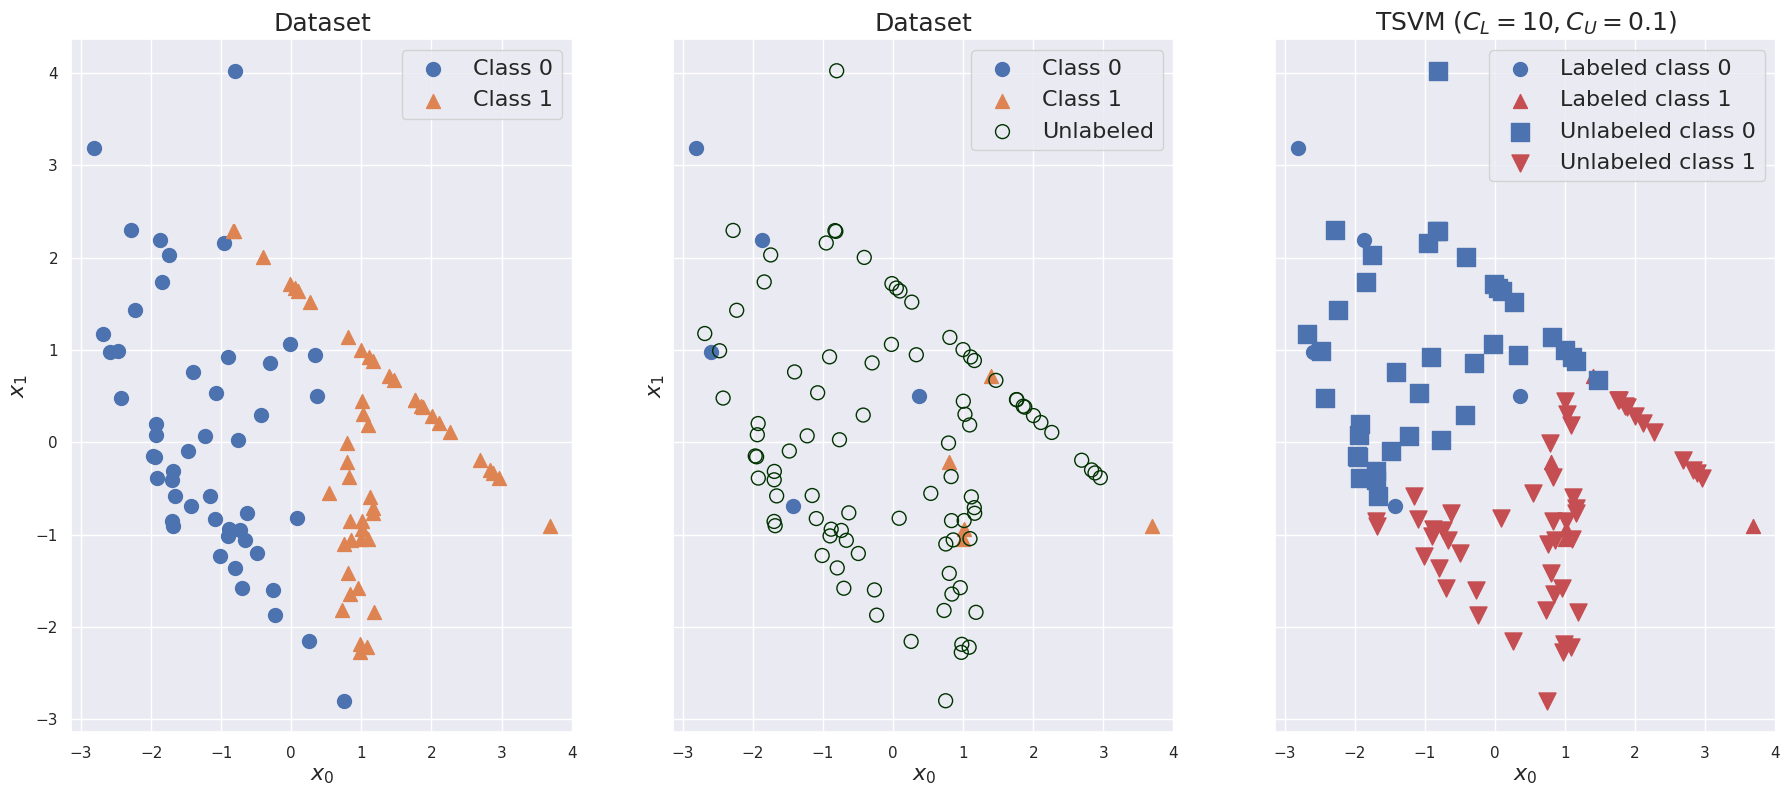

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(22, 9), sharey=True)

ax[0].scatter(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], marker='o', s=100, label='Class 0')
ax[0].scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], marker='^', s=100, label='Class 1')


ax[0].set_xlabel(r'$x_0$', fontsize=16)
ax[0].set_ylabel(r'$x_1$', fontsize=16)
ax[0].set_title('Dataset', fontsize=18)
ax[0].grid(True)
ax[0].legend(fontsize=16)

ax[1].scatter(X[Y == -1, 0], X[Y == -1, 1], marker='o', s=100, label='Class 0')
ax[1].scatter(X[Y == 1, 0], X[Y == 1, 1], marker='^', s=100, label='Class 1')
ax[1].scatter(X[Y == 0, 0], X[Y == 0, 1], facecolor='none', edgecolor='#003200', s=100, label='Unlabeled')

ax[1].set_xlabel(r'$x_0$', fontsize=16)
ax[1].set_ylabel(r'$x_1$', fontsize=16)
ax[1].set_title('Dataset', fontsize=18)
ax[1].grid(True)
ax[1].legend(fontsize=16)

ax[2].scatter(X[Y == -1, 0], X[Y == -1, 1], c='b', marker='o', s=100, label='Labeled class 0')
ax[2].scatter(X[Y == 1, 0], X[Y == 1, 1], c='r', marker='^', s=100, label='Labeled class 1')

ax[2].scatter(Xu[yu == -1, 0], Xu[yu == -1, 1], c='b', marker='s', s=150, label='Unlabeled class 0')
ax[2].scatter(Xu[yu == 1, 0], Xu[yu == 1, 1], c='r', marker='v', s=150, label='Unlabeled class 1')

ax[2].set_xlabel(r'$x_0$', fontsize=16)
ax[2].set_title(r'TSVM ($C_L=10, C_U=0.1$)', fontsize=18)
ax[2].grid(True)
ax[2].legend(fontsize=16)


plt.show()

## TSVM - PODSUMOWANIE


TSVM (Two-Class Support Vector Machines) to potężne modele półnadzorowane, które szczególnie sprawdzają się w scenariuszach, gdzie struktura geometryczna zestawu danych jest godna zaufania, a wszystkie punkty pochodzą z tego samego procesu generowania danych. Jeśli te warunki są spełnione, algorytm może wykorzystać strukturę zestawu danych, aby znaleźć najodpowiedniejsze etykiety dla próbek nienadzorowanych. Z drugiej strony, jeśli próbki nienadzorowane są zakłócone lub ich struktura może wynikać z wielu procesów, TSVM nie jest odpowiednim wyborem i może prowadzić do bardzo niedokładnych wyników.